In [1]:
import requests
import pandas as pd
import json
#import plotly.express as px
import matplotlib.pyplot as plt
import plotmaster as pm
import utils_osm as osm

In [ ]:
ip = 'device_ip'

In [2]:
data_strings = {
    '012': requests.get(f'http://{ip}:1880/get?uuid=f437137a-0d5b-46f7-b204-8ca4b94177aa&drive_id=012').content.decode('utf-8'),
    '031': requests.get(f'http://{ip}:1880/get?uuid=f437137a-0d5b-46f7-b204-8ca4b94177aa&drive_id=031').content.decode('utf-8'),
    '032': requests.get(f'http://{ip}:1880/get?uuid=f437137a-0d5b-46f7-b204-8ca4b94177aa&drive_id=032').content.decode('utf-8'),
    '033': requests.get(f'http://{ip}:1880/get?uuid=f437137a-0d5b-46f7-b204-8ca4b94177aa&drive_id=033').content.decode('utf-8')
}

In [3]:

dataSets = {}

for key in data_strings:
    temp_data_str = json.loads(str(data_strings[key]))
    temp_df = pd.json_normalize(temp_data_str)
    dataSets[key] = temp_df

In [4]:
for key in dataSets:
    dataSets[key] = dataSets[key].drop(columns=['result', 'table', '_start', '_stop', '_time', '_field', 'drive_id', 'fuel_consumption_rt', '_measurement'])
    dataSets[key] = dataSets[key].rename(columns={'_value': 'datetime', 'longtitude': 'longitude'})
    dataSets[key] = dataSets[key][~dataSets[key].apply(lambda row: row.astype(str).str.contains('None')).any(axis=1)]
    display(dataSets[key])

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed
0,2024-08-23T22:09:59.205,14,185C,48.6243081,10.1483547,22,2F
1,2024-08-23T21:57:03.366,15,1472,48.6246399,10.1673637,20,15
2,2024-08-23T22:13:29.343,15,1608,48.6245133,10.1667082,25,15
3,2024-08-23T22:04:50.371,15,1738,48.5928857,10.1338564,20,2B
4,2024-08-23T21:55:46.802,16,14F0,48.6257521,10.1642063,20,15
...,...,...,...,...,...,...,...
1179,2024-08-23T22:08:10.287,FE,37F2,48.6223516,10.1481164,E0,35
1180,2024-08-23T22:08:14.332,FE,3AB0,48.6223516,10.1481164,E0,54
1181,2024-08-23T22:08:16.664,FE,3F46,48.6236059,10.148239,BA,5B
1182,2024-08-23T22:08:11.361,FE,4484,48.6223516,10.1481164,77,41


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed
0,2024-08-24T11:32:42.411,13,1764,48.6232472,10.1686456,20,1F
1,2024-08-24T11:31:57.388,14,1816,48.6221989,10.1635637,21,19
2,2024-08-24T11:23:28.478,14,1920,48.6171938,10.1478042,23,29
3,2024-08-24T11:24:32.397,15,17B8,48.6268812,10.1480093,20,3D
4,2024-08-24T11:28:00.468,16,1684,48.6303458,10.1445051,21,15
...,...,...,...,...,...,...,...
1636,2024-08-24T11:16:00.425,FE,1DC4,48.615096,10.1409494,D5,4B
1637,2024-08-24T11:24:03.387,FE,1F90,48.6208975,10.148149,E1,3E
1638,2024-08-24T11:24:05.465,FE,24E8,48.6215797,10.1480248,E1,49
1640,2024-08-24T11:31:31.432,FE,2790,48.6205484,10.1601089,E1,4D


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed
0,2024-08-24T11:48:01.668,17,19C2,48.613471,10.2020194,22,25
1,2024-08-24T11:47:23.588,18,1530,48.6145896,10.1983863,20,29
2,2024-08-24T11:48:24.669,18,1644,48.6129459,10.2040644,21,1C
3,2024-08-24T11:59:39.517,18,1750,48.4661333,10.1115989,21,46
4,2024-08-24T11:59:38.479,18,19B4,48.4661333,10.1115989,22,4D
...,...,...,...,...,...,...,...
1417,2024-08-24T11:49:08.676,FE,27A6,48.6064187,10.1988164,E1,63
1418,2024-08-24T11:57:39.599,FE,2884,48.4904531,10.0906478,E1,78
1419,2024-08-24T11:49:09.587,FE,28B0,48.6064187,10.1988164,E1,66
1420,2024-08-24T11:49:10.579,FE,2A08,48.6064187,10.1988164,E1,69


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed
0,2024-08-24T12:40:52.218,13,2C1E,48.5408026,10.0961644,48,83
1,2024-08-24T12:46:20.229,15,1A7A,48.612926,10.2072591,22,41
2,2024-08-24T12:50:35.269,15,1B3A,48.619138,10.1807215,22,1B
3,2024-08-24T12:23:14.305,16,16F4,48.4630569,10.0927306,20,0C
4,2024-08-24T12:34:38.296,17,1662,48.4646191,10.1173238,21,42
...,...,...,...,...,...,...,...
1765,2024-08-24T12:38:25.292,FE,43F6,48.4970672,10.0857013,9A,86
1766,2024-08-24T12:49:01.347,FE,4554,48.6147869,10.1960551,88,64
1767,2024-08-24T12:38:26.268,FE,461C,48.4985158,10.0848632,7C,8A
1768,2024-08-24T12:48:56.236,FE,4774,48.6146217,10.1974511,79,44


In [5]:
def convert_values(df_to_convert):
    for index, value in df_to_convert['engine_load'].items():
        #print(value)
        processed_value = int(value, base=16)
        converted_engine_load = (processed_value / 2.55)

        if converted_engine_load is not None:
            df_to_convert.at[index, 'engine_load'] = int(converted_engine_load)
    
    for index, value in df_to_convert['engine_rpm'].items():
        #print(value)
        processed_value_a = int(value[:2], base=16)
        processed_value_b = int(value[2:], base=16)

        converted_engine_rpm = (256*processed_value_a + processed_value_b) / 4

        if converted_engine_rpm is not None:
            df_to_convert.at[index, 'engine_rpm'] = int(converted_engine_rpm)
    
    for index, value in df_to_convert['throttle_pos'].items():
        #print(value)
        processed_value = int(value, base=16)
        converted_throttle_pos = (processed_value / 2.55)

        if converted_throttle_pos is not None:
            df_to_convert.at[index, 'throttle_pos'] = int(converted_throttle_pos)
    
    for index, value in df_to_convert['vehicle_speed'].items():
        processed_value = int(value, base=16)

        if processed_value is not None:
            df_to_convert.at[index, 'vehicle_speed'] = int(processed_value)

    return df_to_convert

In [6]:
for key in dataSets:
    dataSets[key] = convert_values(dataSets[key])
    dataSets[key]['datetime'] = pd.to_datetime(dataSets[key]['datetime'])
    dataSets[key] = dataSets[key].sort_values(by='datetime', ascending=True)
    display(dataSets[key])

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed
747,2024-08-23 21:55:30.824,23,794,48.6257361,10.1641663,12,0
748,2024-08-23 21:55:33.850,23,795,48.6257361,10.1641663,12,0
750,2024-08-23 21:55:36.700,23,813,48.6257331,10.1641541,13,0
760,2024-08-23 21:55:36.707,24,811,48.6257331,10.1641541,12,0
880,2024-08-23 21:55:37.949,38,941,48.6257331,10.1641541,15,2
...,...,...,...,...,...,...,...
771,2024-08-23 22:15:26.805,25,926,48.6257717,10.1641084,13,1
732,2024-08-23 22:15:26.807,23,856,48.6257717,10.1641084,12,0
788,2024-08-23 22:15:26.828,26,899,48.6257717,10.1641084,13,0
912,2024-08-23 22:15:26.839,43,802,48.6257717,10.1641084,14,0


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed
947,2024-08-24 11:09:04.063,24,793,48.6256631,10.1641024,12,0
981,2024-08-24 11:09:07.010,25,788,48.6256631,10.1641024,12,0
927,2024-08-24 11:09:07.985,23,804,48.6256631,10.1641024,12,0
949,2024-08-24 11:09:11.984,24,795,48.6256631,10.1641024,12,0
902,2024-08-24 11:09:12.967,23,810,48.6256631,10.1641024,12,0
...,...,...,...,...,...,...,...
625,2024-08-24 11:36:32.449,16,762,48.6189706,10.1851868,12,0
611,2024-08-24 11:36:33.441,16,758,48.6189706,10.1851868,12,0
624,2024-08-24 11:36:34.461,16,760,48.6189706,10.1851868,12,0
623,2024-08-24 11:36:35.376,16,754,48.6189706,10.1851868,12,0


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed
822,2024-08-24 11:46:26.123,25,811,48.6153842,10.1924551,12,0
862,2024-08-24 11:46:27.113,26,789,48.6153842,10.1924551,12,0
850,2024-08-24 11:46:29.195,26,816,48.6153842,10.1924551,12,0
815,2024-08-24 11:46:31.011,25,792,48.6153842,10.1924551,12,0
846,2024-08-24 11:46:33.103,26,804,48.6153842,10.1924551,12,0
...,...,...,...,...,...,...,...
727,2024-08-24 12:10:15.556,23,799,48.4654205,10.1061119,12,0
739,2024-08-24 12:10:16.585,23,804,48.4654205,10.1061119,12,0
675,2024-08-24 12:10:17.523,23,805,48.4654205,10.1061119,12,0
714,2024-08-24 12:10:19.564,23,794,48.4654205,10.1061119,12,0


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed
602,2024-08-24 12:21:32.830,18,1520,48.463858,10.0960619,15,12
1071,2024-08-24 12:21:35.773,32,791,48.4637962,10.095806,13,11
1218,2024-08-24 12:21:36.772,36,769,48.4637962,10.095806,12,11
748,2024-08-24 12:21:37.623,23,723,48.4637962,10.095806,12,11
1117,2024-08-24 12:21:38.855,33,680,48.4637962,10.095806,14,10
...,...,...,...,...,...,...,...
710,2024-08-24 12:51:03.250,22,820,48.6182817,10.1785627,12,0
694,2024-08-24 12:51:04.261,21,807,48.6182817,10.1785627,12,0
702,2024-08-24 12:51:05.260,22,796,48.6182817,10.1785627,12,0
705,2024-08-24 12:51:06.313,22,801,48.6182817,10.1785627,12,0


---

In [7]:
def plot_datafrane_light(df_plot):
    if 'latitude' in df_plot.columns:
        pm.plot_dataframe(df_plot, ['latitude', 'longitude'], 'datetime')
    else:
        df_plot['latitude'] = float('nan')
        df_plot['longitude'] = float('nan')
        plot_datafrane_light(df_plot)

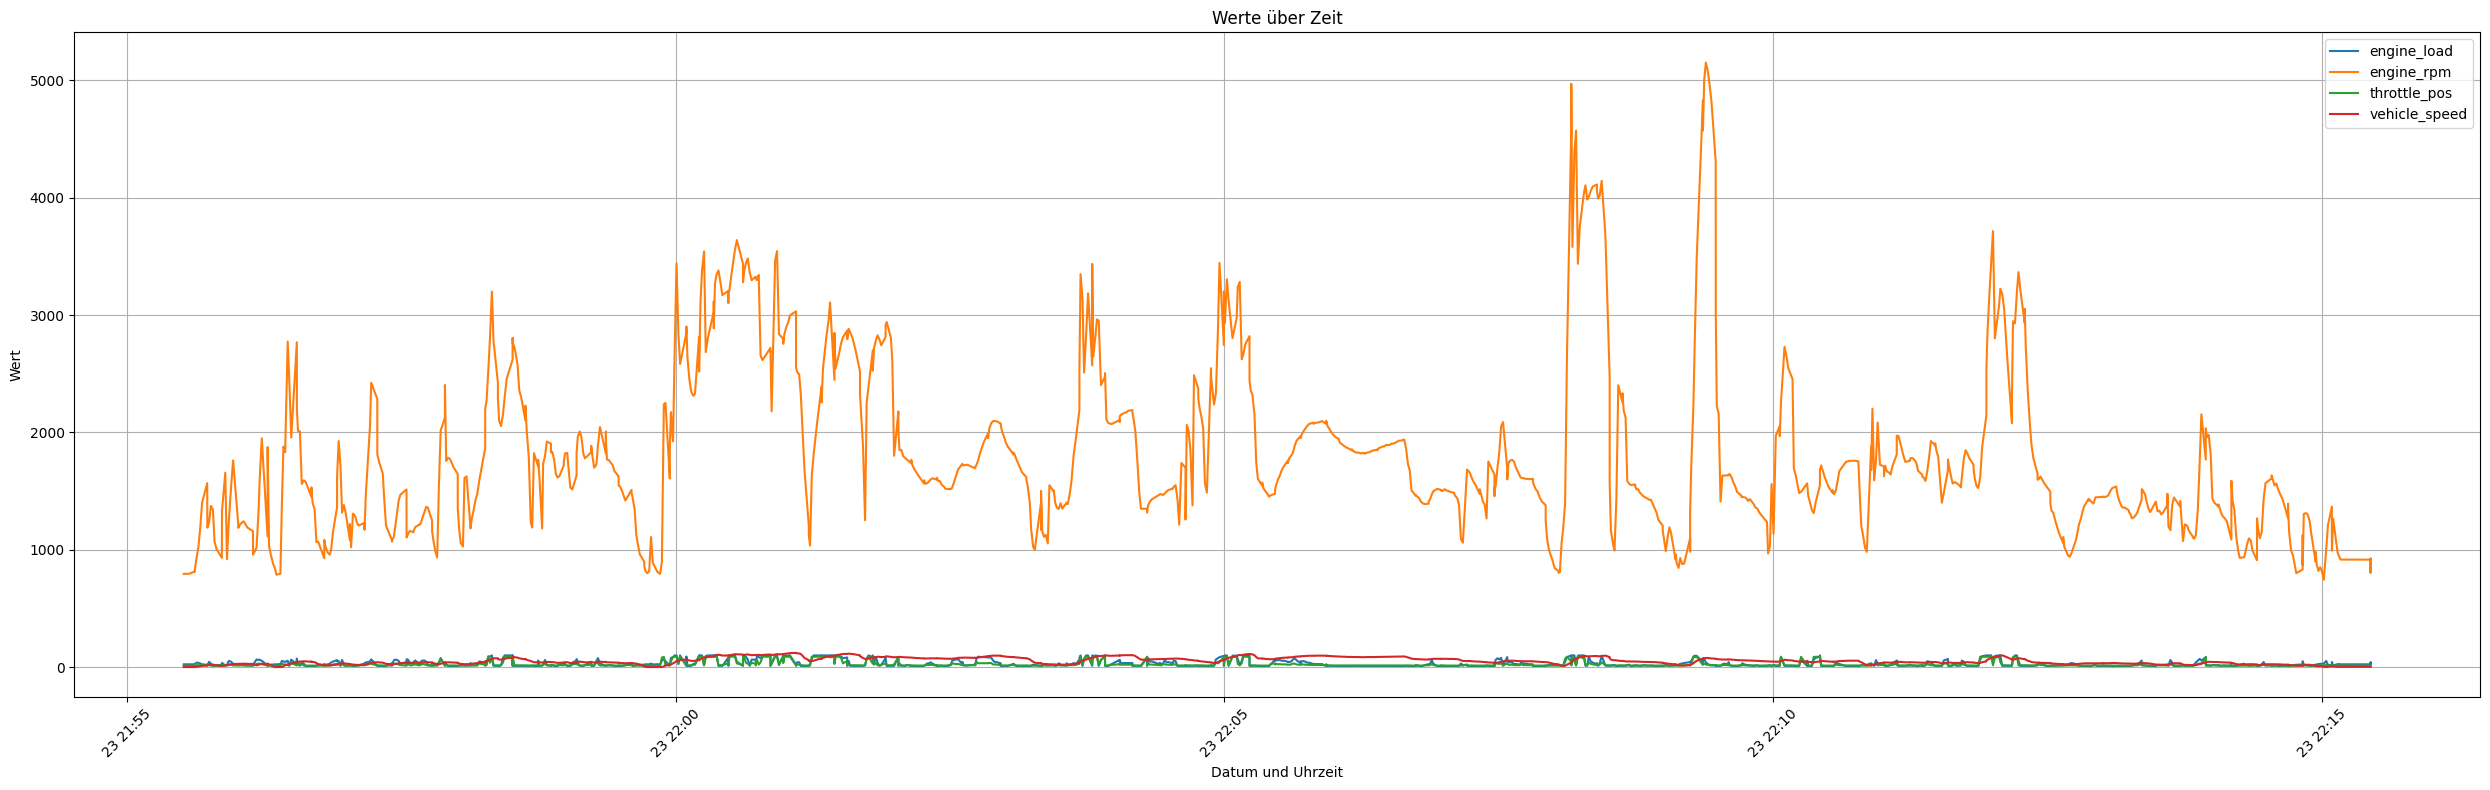

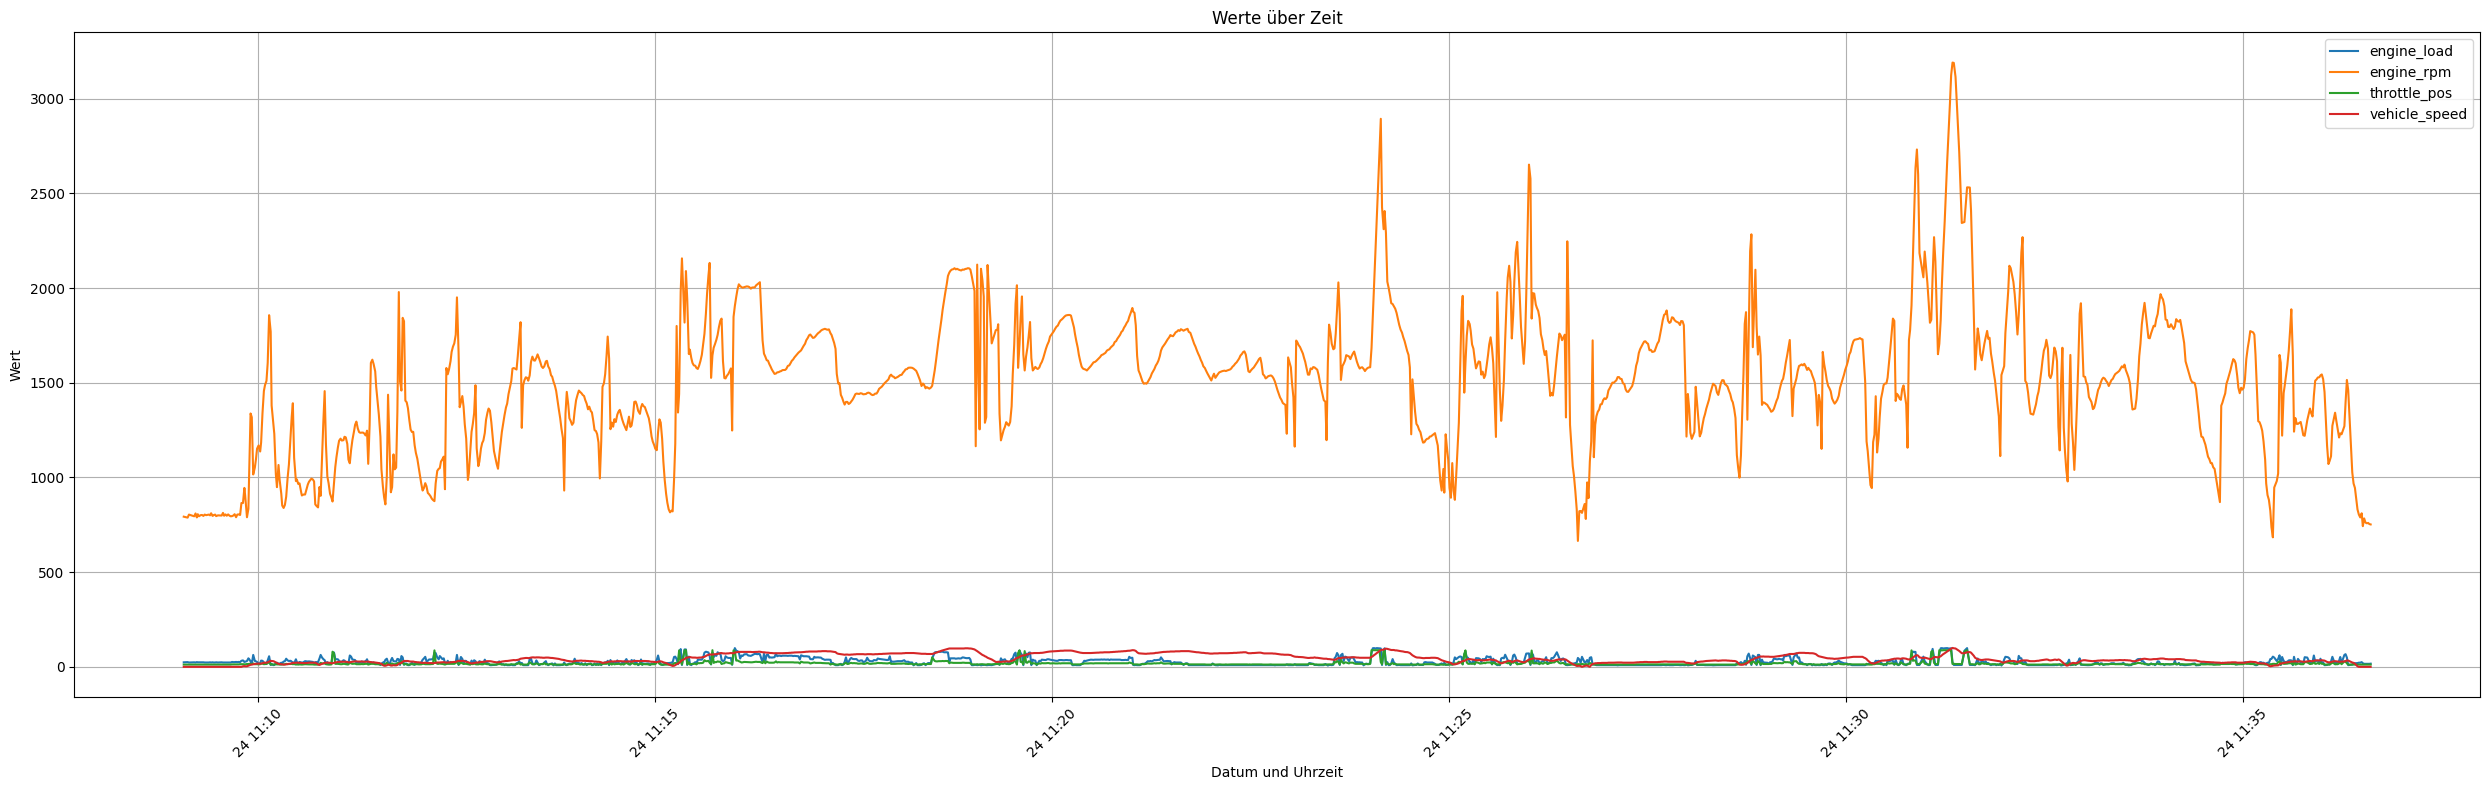

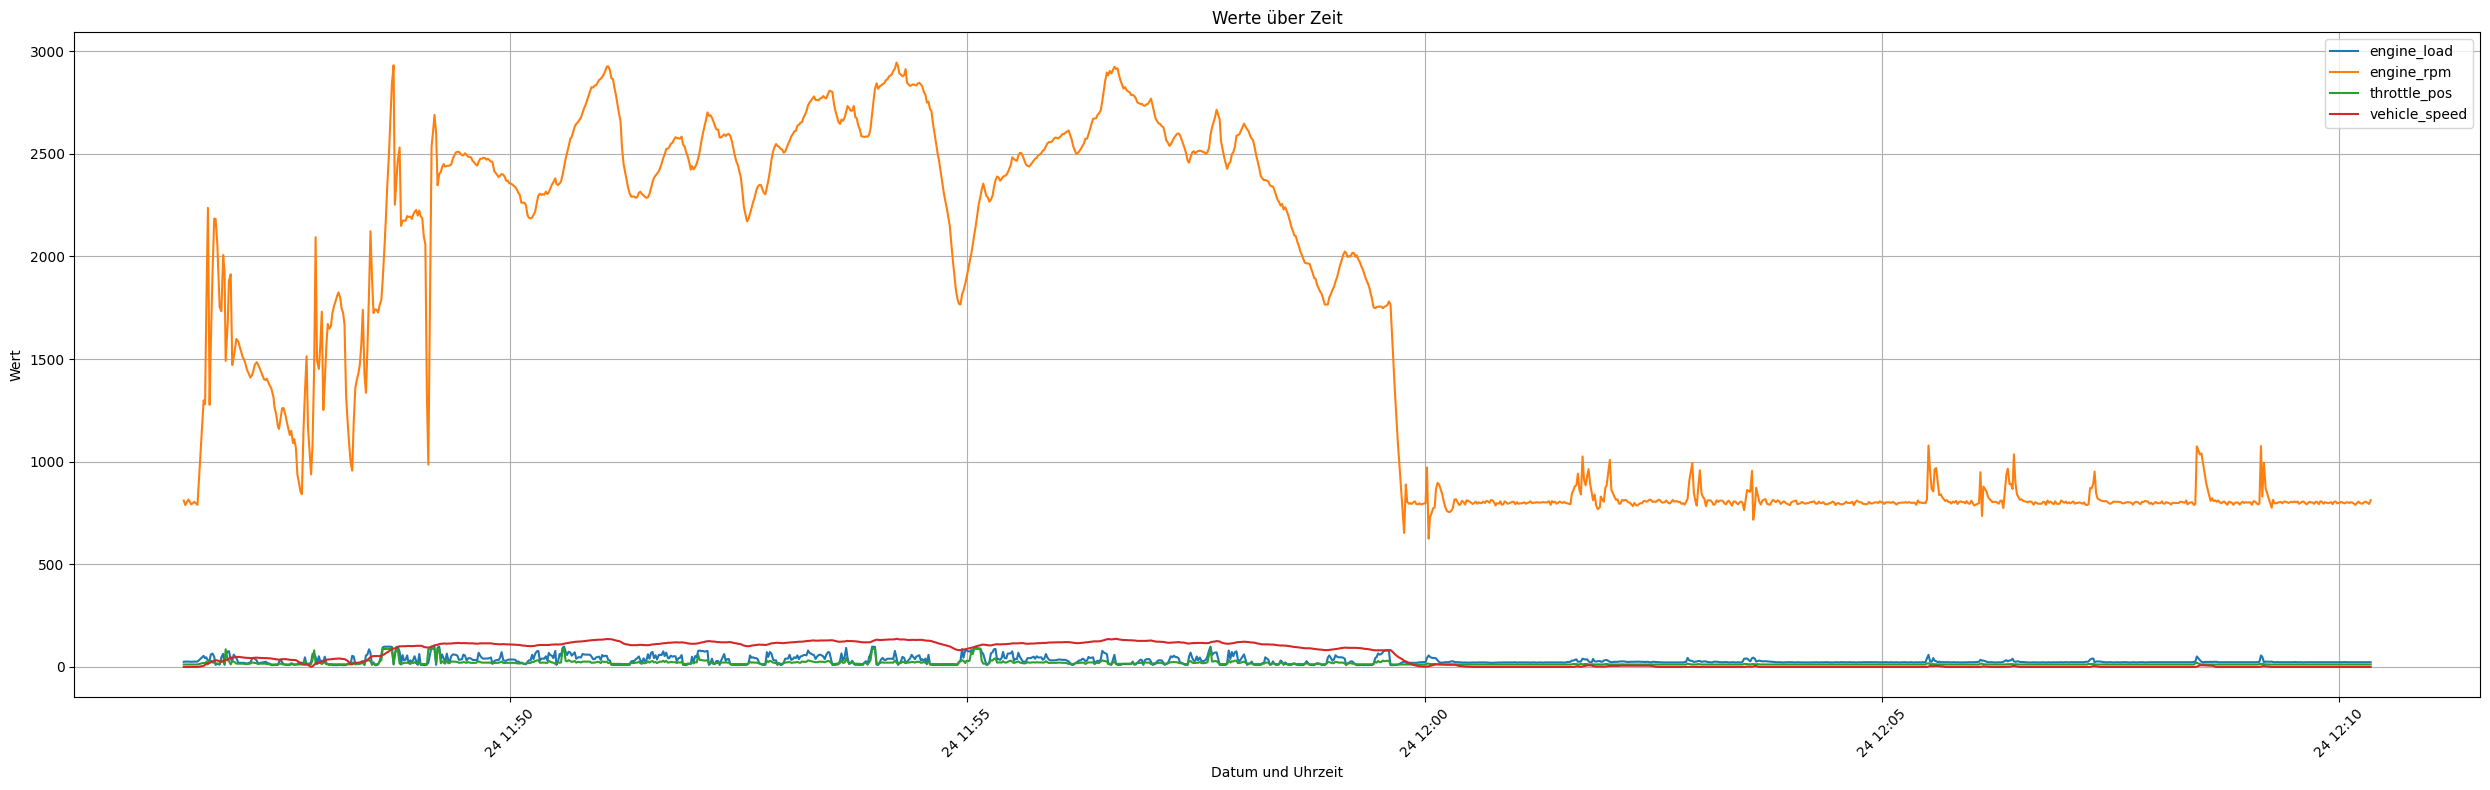

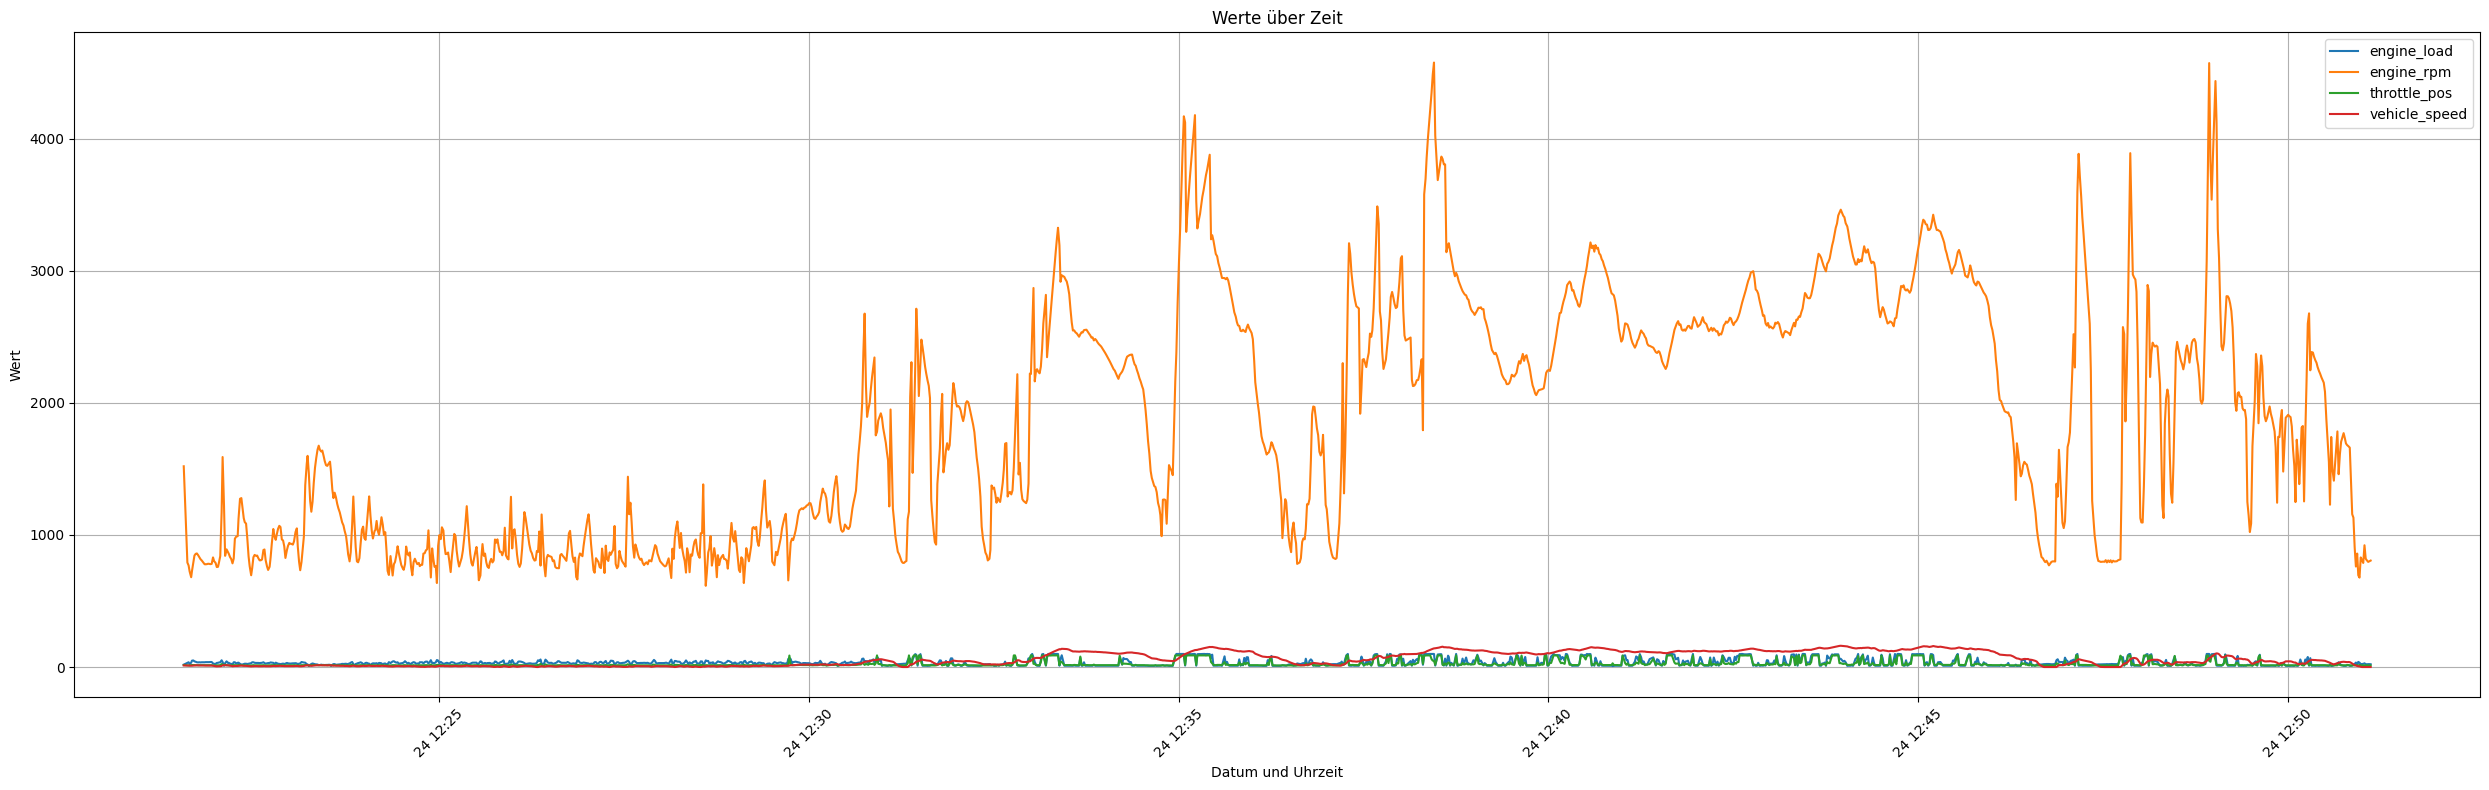

In [8]:
for key in dataSets:
    plot_datafrane_light(dataSets[key])

---
Datenergänzung

In [19]:

def add_calculations(df_preprocessing):
    new_columns = ['allowed_speed', 'delta_engine_rpm', 'delta_engine_load', 'delta_vehicle_speed', 'delta_throttle_pos']

    # Initialisiere die neuen Spalten mit 0
    for column in new_columns:
        df_preprocessing[column] = 0

    new_columns.append('datetime')

    target_columns = [column for column in df_preprocessing.columns if column not in new_columns]
    target_columns.append('allowed_speed')
    
    speed_list = [10, 30, 50, 70, 100, 130]

    # Iteriere über das DataFrame
    previous_row = None
    for index, current_row in df_preprocessing.iterrows():
        for column in target_columns:
            if column in df_preprocessing.columns and column not in ['latitude', 'longitude']:
                # print(column)
                if column == 'allowed_speed':
                    position = {'lat': current_row['latitude'], 'long': current_row['longitude']}
                    speed_limit = osm.location_services.get_speed_limit_OSM_API(osm, position)
                    if speed_limit == -1 and current_row['vehicle_speed'] <= 140:
                        speed_limit = min(speed_list, key=lambda x: abs(x-current_row['vehicle_speed']))
                    elif speed_limit == -1 and current_row['vehicle_speed'] > 140:
                        speed_limit = current_row['vehicle_speed']
                    df_preprocessing.at[index, column] = speed_limit
                try:
                    if previous_row is None:
                        df_preprocessing.at[index, f'delta_{column}'] = 0
                    else:
                        df_preprocessing.at[index, f'delta_{column}'] = int(current_row[column]) - int(previous_row[column])
                except KeyError as e:
                    continue
                except Exception as e:
                    continue

        # Setze die aktuelle Zeile als vorherige Zeile für den nächsten Durchlauf
        previous_row = current_row
    
    return df_preprocessing

In [20]:
for key in dataSets:
    dataSets[key] = add_calculations(dataSets[key])
    display(dataSets[key])

https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(398986107);out;
https://over

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,diff_allowed_speed,delta_allowed_speed,delta_delta_allowed_speed
747,2024-08-23 21:55:30.824,23,794,48.6257361,10.1641663,12,0,10,0,0,0,0,0,0.0,0.0
748,2024-08-23 21:55:33.850,23,795,48.6257361,10.1641663,12,0,10,1,0,0,0,0,0.0,0.0
750,2024-08-23 21:55:36.700,23,813,48.6257331,10.1641541,13,0,10,18,0,0,1,0,0.0,0.0
760,2024-08-23 21:55:36.707,24,811,48.6257331,10.1641541,12,0,10,-2,1,0,-1,0,0.0,0.0
880,2024-08-23 21:55:37.949,38,941,48.6257331,10.1641541,15,2,10,130,14,2,3,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2024-08-23 22:15:26.805,25,926,48.6257717,10.1641084,13,1,10,116,0,1,1,0,0.0,0.0
732,2024-08-23 22:15:26.807,23,856,48.6257717,10.1641084,12,0,10,-70,-2,-1,-1,0,0.0,0.0
788,2024-08-23 22:15:26.828,26,899,48.6257717,10.1641084,13,0,10,43,3,0,1,0,0.0,0.0
912,2024-08-23 22:15:26.839,43,802,48.6257717,10.1641084,14,0,10,-97,17,0,1,0,0.0,0.0


https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(945872992);out;
https://over

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,diff_allowed_speed,delta_allowed_speed,delta_delta_allowed_speed
947,2024-08-24 11:09:04.063,24,793,48.6256631,10.1641024,12,0,10,0,0,0,0,0,0.0,0.0
981,2024-08-24 11:09:07.010,25,788,48.6256631,10.1641024,12,0,10,-5,1,0,0,0,0.0,0.0
927,2024-08-24 11:09:07.985,23,804,48.6256631,10.1641024,12,0,10,16,-2,0,0,0,0.0,0.0
949,2024-08-24 11:09:11.984,24,795,48.6256631,10.1641024,12,0,10,-9,1,0,0,0,0.0,0.0
902,2024-08-24 11:09:12.967,23,810,48.6256631,10.1641024,12,0,10,15,-1,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2024-08-24 11:36:32.449,16,762,48.6189706,10.1851868,12,0,10,-22,0,0,0,0,0.0,0.0
611,2024-08-24 11:36:33.441,16,758,48.6189706,10.1851868,12,0,10,-4,0,0,0,0,0.0,0.0
624,2024-08-24 11:36:34.461,16,760,48.6189706,10.1851868,12,0,10,2,0,0,0,0,0.0,0.0
623,2024-08-24 11:36:35.376,16,754,48.6189706,10.1851868,12,0,10,-6,0,0,0,0,0.0,0.0


https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(320676751);out;
https://over

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,diff_allowed_speed,delta_allowed_speed,delta_delta_allowed_speed
822,2024-08-24 11:46:26.123,25,811,48.6153842,10.1924551,12,0,10,0,0,0,0,0,0.0,0.0
862,2024-08-24 11:46:27.113,26,789,48.6153842,10.1924551,12,0,10,-22,1,0,0,0,0.0,0.0
850,2024-08-24 11:46:29.195,26,816,48.6153842,10.1924551,12,0,10,27,0,0,0,0,0.0,0.0
815,2024-08-24 11:46:31.011,25,792,48.6153842,10.1924551,12,0,10,-24,-1,0,0,0,0.0,0.0
846,2024-08-24 11:46:33.103,26,804,48.6153842,10.1924551,12,0,10,12,1,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2024-08-24 12:10:15.556,23,799,48.4654205,10.1061119,12,0,70,4,0,0,0,0,0.0,0.0
739,2024-08-24 12:10:16.585,23,804,48.4654205,10.1061119,12,0,70,5,0,0,0,0,0.0,0.0
675,2024-08-24 12:10:17.523,23,805,48.4654205,10.1061119,12,0,70,1,0,0,0,0,0.0,0.0
714,2024-08-24 12:10:19.564,23,794,48.4654205,10.1061119,12,0,70,-11,0,0,0,0,0.0,0.0


https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://overpass-api.de/api/interpreter?data=[out:json];way(199171873);out;
https://over

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,diff_allowed_speed,delta_allowed_speed,delta_delta_allowed_speed
602,2024-08-24 12:21:32.830,18,1520,48.463858,10.0960619,15,12,10,0,0,0,0,0,0.0,0.0
1071,2024-08-24 12:21:35.773,32,791,48.4637962,10.095806,13,11,10,-729,14,-1,-2,0,0.0,0.0
1218,2024-08-24 12:21:36.772,36,769,48.4637962,10.095806,12,11,10,-22,4,0,-1,0,0.0,0.0
748,2024-08-24 12:21:37.623,23,723,48.4637962,10.095806,12,11,10,-46,-13,0,0,0,0.0,0.0
1117,2024-08-24 12:21:38.855,33,680,48.4637962,10.095806,14,10,10,-43,10,-1,2,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2024-08-24 12:51:03.250,22,820,48.6182817,10.1785627,12,0,10,-102,-6,0,-1,0,0.0,0.0
694,2024-08-24 12:51:04.261,21,807,48.6182817,10.1785627,12,0,10,-13,-1,0,0,0,0.0,0.0
702,2024-08-24 12:51:05.260,22,796,48.6182817,10.1785627,12,0,10,-11,1,0,0,0,0.0,0.0
705,2024-08-24 12:51:06.313,22,801,48.6182817,10.1785627,12,0,10,5,0,0,0,0,0.0,0.0


In [21]:
for key in dataSets:
    #dataSets[key] = dataSets[key].drop(columns=['delta_latitude', 'delta_longitude'])
    display(dataSets[key])
    print(dataSets[key]['allowed_speed'].unique())

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,diff_allowed_speed,delta_allowed_speed,delta_delta_allowed_speed
747,2024-08-23 21:55:30.824,23,794,48.6257361,10.1641663,12,0,10,0,0,0,0,0,0.0,0.0
748,2024-08-23 21:55:33.850,23,795,48.6257361,10.1641663,12,0,10,1,0,0,0,0,0.0,0.0
750,2024-08-23 21:55:36.700,23,813,48.6257331,10.1641541,13,0,10,18,0,0,1,0,0.0,0.0
760,2024-08-23 21:55:36.707,24,811,48.6257331,10.1641541,12,0,10,-2,1,0,-1,0,0.0,0.0
880,2024-08-23 21:55:37.949,38,941,48.6257331,10.1641541,15,2,10,130,14,2,3,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2024-08-23 22:15:26.805,25,926,48.6257717,10.1641084,13,1,10,116,0,1,1,0,0.0,0.0
732,2024-08-23 22:15:26.807,23,856,48.6257717,10.1641084,12,0,10,-70,-2,-1,-1,0,0.0,0.0
788,2024-08-23 22:15:26.828,26,899,48.6257717,10.1641084,13,0,10,43,3,0,1,0,0.0,0.0
912,2024-08-23 22:15:26.839,43,802,48.6257717,10.1641084,14,0,10,-97,17,0,1,0,0.0,0.0


[ 10  30  50  70 100 130]


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,diff_allowed_speed,delta_allowed_speed,delta_delta_allowed_speed
947,2024-08-24 11:09:04.063,24,793,48.6256631,10.1641024,12,0,10,0,0,0,0,0,0.0,0.0
981,2024-08-24 11:09:07.010,25,788,48.6256631,10.1641024,12,0,10,-5,1,0,0,0,0.0,0.0
927,2024-08-24 11:09:07.985,23,804,48.6256631,10.1641024,12,0,10,16,-2,0,0,0,0.0,0.0
949,2024-08-24 11:09:11.984,24,795,48.6256631,10.1641024,12,0,10,-9,1,0,0,0,0.0,0.0
902,2024-08-24 11:09:12.967,23,810,48.6256631,10.1641024,12,0,10,15,-1,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2024-08-24 11:36:32.449,16,762,48.6189706,10.1851868,12,0,10,-22,0,0,0,0,0.0,0.0
611,2024-08-24 11:36:33.441,16,758,48.6189706,10.1851868,12,0,10,-4,0,0,0,0,0.0,0.0
624,2024-08-24 11:36:34.461,16,760,48.6189706,10.1851868,12,0,10,2,0,0,0,0,0.0,0.0
623,2024-08-24 11:36:35.376,16,754,48.6189706,10.1851868,12,0,10,-6,0,0,0,0,0.0,0.0


[ 10  30  50  70 100]


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,diff_allowed_speed,delta_allowed_speed,delta_delta_allowed_speed
822,2024-08-24 11:46:26.123,25,811,48.6153842,10.1924551,12,0,10,0,0,0,0,0,0.0,0.0
862,2024-08-24 11:46:27.113,26,789,48.6153842,10.1924551,12,0,10,-22,1,0,0,0,0.0,0.0
850,2024-08-24 11:46:29.195,26,816,48.6153842,10.1924551,12,0,10,27,0,0,0,0,0.0,0.0
815,2024-08-24 11:46:31.011,25,792,48.6153842,10.1924551,12,0,10,-24,-1,0,0,0,0.0,0.0
846,2024-08-24 11:46:33.103,26,804,48.6153842,10.1924551,12,0,10,12,1,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2024-08-24 12:10:15.556,23,799,48.4654205,10.1061119,12,0,70,4,0,0,0,0,0.0,0.0
739,2024-08-24 12:10:16.585,23,804,48.4654205,10.1061119,12,0,70,5,0,0,0,0,0.0,0.0
675,2024-08-24 12:10:17.523,23,805,48.4654205,10.1061119,12,0,70,1,0,0,0,0,0.0,0.0
714,2024-08-24 12:10:19.564,23,794,48.4654205,10.1061119,12,0,70,-11,0,0,0,0,0.0,0.0


[ 10  30  50  70 100 130]


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,diff_allowed_speed,delta_allowed_speed,delta_delta_allowed_speed
602,2024-08-24 12:21:32.830,18,1520,48.463858,10.0960619,15,12,10,0,0,0,0,0,0.0,0.0
1071,2024-08-24 12:21:35.773,32,791,48.4637962,10.095806,13,11,10,-729,14,-1,-2,0,0.0,0.0
1218,2024-08-24 12:21:36.772,36,769,48.4637962,10.095806,12,11,10,-22,4,0,-1,0,0.0,0.0
748,2024-08-24 12:21:37.623,23,723,48.4637962,10.095806,12,11,10,-46,-13,0,0,0,0.0,0.0
1117,2024-08-24 12:21:38.855,33,680,48.4637962,10.095806,14,10,10,-43,10,-1,2,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2024-08-24 12:51:03.250,22,820,48.6182817,10.1785627,12,0,10,-102,-6,0,-1,0,0.0,0.0
694,2024-08-24 12:51:04.261,21,807,48.6182817,10.1785627,12,0,10,-13,-1,0,0,0,0.0,0.0
702,2024-08-24 12:51:05.260,22,796,48.6182817,10.1785627,12,0,10,-11,1,0,0,0,0.0,0.0
705,2024-08-24 12:51:06.313,22,801,48.6182817,10.1785627,12,0,10,5,0,0,0,0,0.0,0.0


[ 10  30  50  70 100 130 142 144 146 148 150 152 151 147 145 141 154 149
 143 156 158 160 161 159 157 155]


In [46]:
def calc_moving_average(df_preprocessing, target_columns, range):
    for column in df_preprocessing.columns:
        if column in target_columns:
            df_preprocessing[f'ma_{column}'] = df_preprocessing[column].rolling(window=range, min_periods=1).mean().round(0)
    
    return df_preprocessing

In [55]:
for key in dataSets:
    #dataSets[key] = dataSets[key].drop(columns=['delta_delta_allowed_speed'])
    target_columns = [column for column in dataSets[key].columns if column not in ['datetime', 'latitude', 'longitude', 'allowed_speed']]
    dataSets[key] = calc_moving_average(dataSets[key], target_columns, 5)

In [54]:
for key in dataSets:
    dataSets[key].to_csv(f'E:\\MLD Studium\\Sem02\\Projektarbeit\\Coding\\CarSenseML\\src\\prototyping\\data\\{key}.csv', ';', index=False)

C:\Users\NilsO\AppData\Local\Temp\ipykernel_1380\1774866122.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  dataSets[key].to_csv(f'E:\\MLD Studium\\Sem02\\Projektarbeit\\Coding\\CarSenseML\\src\\prototyping\\data\\{key}.csv', ';', index=False)


In [56]:
for key in dataSets:
    #dataSets[key] = dataSets[key].drop(columns=['ma_diff_allowed_speed'])
    display(dataSets[key])
    print(dataSets[key].columns)

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,ma_delta_allowed_speed,ma_ma_engine_load,ma_ma_engine_rpm,ma_ma_throttle_pos,ma_ma_vehicle_speed,ma_ma_delta_engine_rpm,ma_ma_delta_engine_load,ma_ma_delta_vehicle_speed,ma_ma_delta_throttle_pos,ma_ma_delta_allowed_speed
0,2024-08-23 21:55:30.824,23,794,48.625736,10.164166,12,0,10,0,0,...,0.0,23.0,794.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-23 21:55:33.850,23,795,48.625736,10.164166,12,0,10,1,0,...,0.0,23.0,794.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-08-23 21:55:36.700,23,813,48.625733,10.164154,13,0,10,18,0,...,0.0,23.0,796.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0
3,2024-08-23 21:55:36.707,24,811,48.625733,10.164154,12,0,10,-2,1,...,0.0,23.0,798.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0
4,2024-08-23 21:55:37.949,38,941,48.625733,10.164154,15,2,10,130,14,...,0.0,24.0,805.0,12.0,0.0,8.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,2024-08-23 22:15:26.805,25,926,48.625772,10.164108,13,1,10,116,0,...,0.0,23.0,873.0,12.0,1.0,-31.0,0.0,-0.0,0.0,0.0
1130,2024-08-23 22:15:26.807,23,856,48.625772,10.164108,12,0,10,-70,-2,...,0.0,23.0,861.0,12.0,0.0,-12.0,-0.0,0.0,0.0,0.0
1131,2024-08-23 22:15:26.828,26,899,48.625772,10.164108,13,0,10,43,3,...,0.0,23.0,858.0,12.0,0.0,-3.0,0.0,0.0,0.0,0.0
1132,2024-08-23 22:15:26.839,43,802,48.625772,10.164108,14,0,10,-97,17,...,0.0,24.0,857.0,12.0,0.0,-2.0,1.0,0.0,0.0,0.0


Index(['datetime', 'engine_load', 'engine_rpm', 'latitude', 'longitude',
       'throttle_pos', 'vehicle_speed', 'allowed_speed', 'delta_engine_rpm',
       'delta_engine_load', 'delta_vehicle_speed', 'delta_throttle_pos',
       'delta_allowed_speed', 'ma_engine_load', 'ma_engine_rpm',
       'ma_throttle_pos', 'ma_vehicle_speed', 'ma_delta_engine_rpm',
       'ma_delta_engine_load', 'ma_delta_vehicle_speed',
       'ma_delta_throttle_pos', 'ma_delta_allowed_speed', 'ma_ma_engine_load',
       'ma_ma_engine_rpm', 'ma_ma_throttle_pos', 'ma_ma_vehicle_speed',
       'ma_ma_delta_engine_rpm', 'ma_ma_delta_engine_load',
       'ma_ma_delta_vehicle_speed', 'ma_ma_delta_throttle_pos',
       'ma_ma_delta_allowed_speed'],
      dtype='object')


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,ma_delta_allowed_speed,ma_ma_engine_load,ma_ma_engine_rpm,ma_ma_throttle_pos,ma_ma_vehicle_speed,ma_ma_delta_engine_rpm,ma_ma_delta_engine_load,ma_ma_delta_vehicle_speed,ma_ma_delta_throttle_pos,ma_ma_delta_allowed_speed
0,2024-08-24 11:09:04.063,24,793,48.625663,10.164102,12,0,10,0,0,...,0.0,24.0,793.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-24 11:09:07.010,25,788,48.625663,10.164102,12,0,10,-5,1,...,0.0,24.0,792.0,12.0,0.0,-1.0,0.0,0.0,0.0,0.0
2,2024-08-24 11:09:07.985,23,804,48.625663,10.164102,12,0,10,16,-2,...,0.0,24.0,793.0,12.0,0.0,1.0,-0.0,0.0,0.0,0.0
3,2024-08-24 11:09:11.984,24,795,48.625663,10.164102,12,0,10,-9,1,...,0.0,24.0,793.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-08-24 11:09:12.967,23,810,48.625663,10.164102,12,0,10,15,-1,...,0.0,24.0,794.0,12.0,0.0,1.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,2024-08-24 11:36:32.449,16,762,48.618971,10.185187,12,0,10,-22,0,...,0.0,21.0,813.0,12.0,3.0,-27.0,0.0,-3.0,0.0,0.0
1531,2024-08-24 11:36:33.441,16,758,48.618971,10.185187,12,0,10,-4,0,...,0.0,21.0,794.0,12.0,1.0,-19.0,-0.0,-2.0,0.0,0.0
1532,2024-08-24 11:36:34.461,16,760,48.618971,10.185187,12,0,10,2,0,...,0.0,20.0,779.0,12.0,0.0,-15.0,-1.0,-1.0,0.0,0.0
1533,2024-08-24 11:36:35.376,16,754,48.618971,10.185187,12,0,10,-6,0,...,0.0,18.0,772.0,12.0,0.0,-6.0,-1.0,-0.0,0.0,0.0


Index(['datetime', 'engine_load', 'engine_rpm', 'latitude', 'longitude',
       'throttle_pos', 'vehicle_speed', 'allowed_speed', 'delta_engine_rpm',
       'delta_engine_load', 'delta_vehicle_speed', 'delta_throttle_pos',
       'delta_allowed_speed', 'ma_engine_load', 'ma_engine_rpm',
       'ma_throttle_pos', 'ma_vehicle_speed', 'ma_delta_engine_rpm',
       'ma_delta_engine_load', 'ma_delta_vehicle_speed',
       'ma_delta_throttle_pos', 'ma_delta_allowed_speed', 'ma_ma_engine_load',
       'ma_ma_engine_rpm', 'ma_ma_throttle_pos', 'ma_ma_vehicle_speed',
       'ma_ma_delta_engine_rpm', 'ma_ma_delta_engine_load',
       'ma_ma_delta_vehicle_speed', 'ma_ma_delta_throttle_pos',
       'ma_ma_delta_allowed_speed'],
      dtype='object')


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,ma_delta_allowed_speed,ma_ma_engine_load,ma_ma_engine_rpm,ma_ma_throttle_pos,ma_ma_vehicle_speed,ma_ma_delta_engine_rpm,ma_ma_delta_engine_load,ma_ma_delta_vehicle_speed,ma_ma_delta_throttle_pos,ma_ma_delta_allowed_speed
0,2024-08-24 11:46:26.123,25,811,48.615384,10.192455,12,0,10,0,0,...,0.0,25.0,811.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-24 11:46:27.113,26,789,48.615384,10.192455,12,0,10,-22,1,...,0.0,26.0,806.0,12.0,0.0,-6.0,0.0,0.0,0.0,0.0
2,2024-08-24 11:46:29.195,26,816,48.615384,10.192455,12,0,10,27,0,...,0.0,26.0,805.0,12.0,0.0,-3.0,0.0,0.0,0.0,0.0
3,2024-08-24 11:46:31.011,25,792,48.615384,10.192455,12,0,10,-24,-1,...,0.0,26.0,804.0,12.0,0.0,-4.0,0.0,0.0,0.0,0.0
4,2024-08-24 11:46:33.103,26,804,48.615384,10.192455,12,0,10,12,1,...,0.0,26.0,804.0,12.0,0.0,-3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,2024-08-24 12:10:15.556,23,799,48.465421,10.106112,12,0,70,4,0,...,0.0,23.0,799.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1327,2024-08-24 12:10:16.585,23,804,48.465421,10.106112,12,0,70,5,0,...,0.0,23.0,799.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,2024-08-24 12:10:17.523,23,805,48.465421,10.106112,12,0,70,1,0,...,0.0,23.0,799.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1329,2024-08-24 12:10:19.564,23,794,48.465421,10.106112,12,0,70,-11,0,...,0.0,23.0,799.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0


Index(['datetime', 'engine_load', 'engine_rpm', 'latitude', 'longitude',
       'throttle_pos', 'vehicle_speed', 'allowed_speed', 'delta_engine_rpm',
       'delta_engine_load', 'delta_vehicle_speed', 'delta_throttle_pos',
       'delta_allowed_speed', 'ma_engine_load', 'ma_engine_rpm',
       'ma_throttle_pos', 'ma_vehicle_speed', 'ma_delta_engine_rpm',
       'ma_delta_engine_load', 'ma_delta_vehicle_speed',
       'ma_delta_throttle_pos', 'ma_delta_allowed_speed', 'ma_ma_engine_load',
       'ma_ma_engine_rpm', 'ma_ma_throttle_pos', 'ma_ma_vehicle_speed',
       'ma_ma_delta_engine_rpm', 'ma_ma_delta_engine_load',
       'ma_ma_delta_vehicle_speed', 'ma_ma_delta_throttle_pos',
       'ma_ma_delta_allowed_speed'],
      dtype='object')


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,ma_delta_allowed_speed,ma_ma_engine_load,ma_ma_engine_rpm,ma_ma_throttle_pos,ma_ma_vehicle_speed,ma_ma_delta_engine_rpm,ma_ma_delta_engine_load,ma_ma_delta_vehicle_speed,ma_ma_delta_throttle_pos,ma_ma_delta_allowed_speed
0,2024-08-24 12:21:32.830,18,1520,48.463858,10.096062,15,12,10,0,0,...,0.0,18.0,1520.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-24 12:21:35.773,32,791,48.463796,10.095806,13,11,10,-729,14,...,0.0,22.0,1338.0,14.0,12.0,-182.0,4.0,-0.0,-0.0,0.0
2,2024-08-24 12:21:36.772,36,769,48.463796,10.095806,12,11,10,-22,4,...,0.0,24.0,1234.0,14.0,12.0,-205.0,4.0,-0.0,-1.0,0.0
3,2024-08-24 12:21:37.623,23,723,48.463796,10.095806,12,11,10,-46,-13,...,0.0,25.0,1164.0,14.0,12.0,-203.0,4.0,-0.0,-1.0,0.0
4,2024-08-24 12:21:38.855,33,680,48.463796,10.095806,14,10,10,-43,10,...,0.0,25.0,1110.0,14.0,11.0,-196.0,3.0,-0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2024-08-24 12:51:03.250,22,820,48.618282,10.178563,12,0,10,-102,-6,...,0.0,27.0,787.0,13.0,3.0,11.0,-1.0,-2.0,-0.0,0.0
1662,2024-08-24 12:51:04.261,21,807,48.618282,10.178563,12,0,10,-13,-1,...,0.0,26.0,800.0,13.0,2.0,13.0,-1.0,-1.0,-0.0,0.0
1663,2024-08-24 12:51:05.260,22,796,48.618282,10.178563,12,0,10,-11,1,...,0.0,25.0,811.0,12.0,1.0,11.0,-1.0,-1.0,-0.0,0.0
1664,2024-08-24 12:51:06.313,22,801,48.618282,10.178563,12,0,10,5,0,...,0.0,24.0,825.0,12.0,0.0,14.0,-1.0,-0.0,-0.0,0.0


Index(['datetime', 'engine_load', 'engine_rpm', 'latitude', 'longitude',
       'throttle_pos', 'vehicle_speed', 'allowed_speed', 'delta_engine_rpm',
       'delta_engine_load', 'delta_vehicle_speed', 'delta_throttle_pos',
       'delta_allowed_speed', 'ma_engine_load', 'ma_engine_rpm',
       'ma_throttle_pos', 'ma_vehicle_speed', 'ma_delta_engine_rpm',
       'ma_delta_engine_load', 'ma_delta_vehicle_speed',
       'ma_delta_throttle_pos', 'ma_delta_allowed_speed', 'ma_ma_engine_load',
       'ma_ma_engine_rpm', 'ma_ma_throttle_pos', 'ma_ma_vehicle_speed',
       'ma_ma_delta_engine_rpm', 'ma_ma_delta_engine_load',
       'ma_ma_delta_vehicle_speed', 'ma_ma_delta_throttle_pos',
       'ma_ma_delta_allowed_speed'],
      dtype='object')


In [3]:
import os 
import pandas as pd

dataSets = {}

for file in os.listdir(f'E:\\MLD Studium\\Sem02\\Projektarbeit\\Coding\\CarSenseML\\src\\prototyping\\data\\'):
    file_id = file.split('.')[0]
    dataSets[file_id] = pd.read_csv(f'E:\\MLD Studium\\Sem02\\Projektarbeit\\Coding\\CarSenseML\\src\\prototyping\\data\\{file}', sep=';')

for key in dataSets:
    display(dataSets[key])

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,delta_allowed_speed,ma_engine_load,ma_engine_rpm,ma_throttle_pos,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed
0,2024-08-23 21:55:30.824,23,794,48.625736,10.164166,12,0,10,0,0,...,0.0,23.0,794.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-23 21:55:33.850,23,795,48.625736,10.164166,12,0,10,1,0,...,0.0,23.0,794.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-08-23 21:55:36.700,23,813,48.625733,10.164154,13,0,10,18,0,...,0.0,23.0,801.0,12.0,0.0,6.0,0.0,0.0,0.0,0.0
3,2024-08-23 21:55:36.707,24,811,48.625733,10.164154,12,0,10,-2,1,...,0.0,23.0,803.0,12.0,0.0,4.0,0.0,0.0,0.0,0.0
4,2024-08-23 21:55:37.949,38,941,48.625733,10.164154,15,2,10,130,14,...,0.0,26.0,831.0,13.0,0.0,29.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,2024-08-23 22:15:26.805,25,926,48.625772,10.164108,13,1,10,116,0,...,0.0,23.0,928.0,12.0,1.0,-6.0,-2.0,-1.0,-0.0,0.0
1130,2024-08-23 22:15:26.807,23,856,48.625772,10.164108,12,0,10,-70,-2,...,0.0,24.0,887.0,12.0,1.0,-41.0,1.0,-0.0,-0.0,0.0
1131,2024-08-23 22:15:26.828,26,899,48.625772,10.164108,13,0,10,43,3,...,0.0,24.0,879.0,12.0,1.0,-8.0,0.0,-0.0,0.0,0.0
1132,2024-08-23 22:15:26.839,43,802,48.625772,10.164108,14,0,10,-97,17,...,0.0,26.0,863.0,12.0,0.0,-16.0,2.0,-0.0,0.0,0.0


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,delta_allowed_speed,ma_engine_load,ma_engine_rpm,ma_throttle_pos,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed
0,2024-08-24 11:09:04.063,24,793,48.625663,10.164102,12,0,10,0,0,...,0.0,24.0,793.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-24 11:09:07.010,25,788,48.625663,10.164102,12,0,10,-5,1,...,0.0,24.0,790.0,12.0,0.0,-2.0,0.0,0.0,0.0,0.0
2,2024-08-24 11:09:07.985,23,804,48.625663,10.164102,12,0,10,16,-2,...,0.0,24.0,795.0,12.0,0.0,4.0,-0.0,0.0,0.0,0.0
3,2024-08-24 11:09:11.984,24,795,48.625663,10.164102,12,0,10,-9,1,...,0.0,24.0,795.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-08-24 11:09:12.967,23,810,48.625663,10.164102,12,0,10,15,-1,...,0.0,24.0,798.0,12.0,0.0,3.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,2024-08-24 11:36:32.449,16,762,48.618971,10.185187,12,0,10,-22,0,...,0.0,19.0,846.0,12.0,6.0,-56.0,1.0,-3.0,0.0,0.0
1531,2024-08-24 11:36:33.441,16,758,48.618971,10.185187,12,0,10,-4,0,...,0.0,19.0,820.0,12.0,4.0,-27.0,0.0,-2.0,0.0,0.0
1532,2024-08-24 11:36:34.461,16,760,48.618971,10.185187,12,0,10,2,0,...,0.0,19.0,799.0,12.0,2.0,-21.0,-0.0,-2.0,0.0,0.0
1533,2024-08-24 11:36:35.376,16,754,48.618971,10.185187,12,0,10,-6,0,...,0.0,19.0,780.0,12.0,0.0,-19.0,-0.0,-2.0,0.0,0.0


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,delta_allowed_speed,ma_engine_load,ma_engine_rpm,ma_throttle_pos,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed
0,2024-08-24 11:46:26.123,25,811,48.615384,10.192455,12,0,10,0,0,...,0.0,25.0,811.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-24 11:46:27.113,26,789,48.615384,10.192455,12,0,10,-22,1,...,0.0,26.0,800.0,12.0,0.0,-11.0,0.0,0.0,0.0,0.0
2,2024-08-24 11:46:29.195,26,816,48.615384,10.192455,12,0,10,27,0,...,0.0,26.0,805.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0
3,2024-08-24 11:46:31.011,25,792,48.615384,10.192455,12,0,10,-24,-1,...,0.0,26.0,802.0,12.0,0.0,-5.0,0.0,0.0,0.0,0.0
4,2024-08-24 11:46:33.103,26,804,48.615384,10.192455,12,0,10,12,1,...,0.0,26.0,802.0,12.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,2024-08-24 12:10:15.556,23,799,48.465421,10.106112,12,0,70,4,0,...,0.0,23.0,799.0,12.0,0.0,-0.0,0.0,0.0,0.0,0.0
1327,2024-08-24 12:10:16.585,23,804,48.465421,10.106112,12,0,70,5,0,...,0.0,23.0,799.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1328,2024-08-24 12:10:17.523,23,805,48.465421,10.106112,12,0,70,1,0,...,0.0,23.0,800.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0
1329,2024-08-24 12:10:19.564,23,794,48.465421,10.106112,12,0,70,-11,0,...,0.0,23.0,799.0,12.0,0.0,-1.0,0.0,0.0,0.0,0.0


,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,delta_allowed_speed,ma_engine_load,ma_engine_rpm,ma_throttle_pos,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed
0,2024-08-24 12:21:32.830,18,1520,48.463858,10.096062,15,12,10,0,0,...,0.0,18.0,1520.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-24 12:21:35.773,32,791,48.463796,10.095806,13,11,10,-729,14,...,0.0,25.0,1156.0,14.0,12.0,-364.0,7.0,-0.0,-1.0,0.0
2,2024-08-24 12:21:36.772,36,769,48.463796,10.095806,12,11,10,-22,4,...,0.0,29.0,1027.0,13.0,11.0,-250.0,6.0,-0.0,-1.0,0.0
3,2024-08-24 12:21:37.623,23,723,48.463796,10.095806,12,11,10,-46,-13,...,0.0,27.0,951.0,13.0,11.0,-199.0,1.0,-0.0,-1.0,0.0
4,2024-08-24 12:21:38.855,33,680,48.463796,10.095806,14,10,10,-43,10,...,0.0,28.0,897.0,13.0,11.0,-168.0,3.0,-0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2024-08-24 12:51:03.250,22,820,48.618282,10.178563,12,0,10,-102,-6,...,0.0,27.0,806.0,13.0,5.0,-31.0,0.0,-2.0,-0.0,0.0
1662,2024-08-24 12:51:04.261,21,807,48.618282,10.178563,12,0,10,-13,-1,...,0.0,27.0,797.0,13.0,3.0,-10.0,-0.0,-1.0,-0.0,0.0
1663,2024-08-24 12:51:05.260,22,796,48.618282,10.178563,12,0,10,-11,1,...,0.0,25.0,800.0,12.0,2.0,4.0,-1.0,-1.0,-0.0,0.0
1664,2024-08-24 12:51:06.313,22,801,48.618282,10.178563,12,0,10,5,0,...,0.0,26.0,794.0,12.0,1.0,-6.0,0.0,-1.0,0.0,0.0


In [2]:
for key in dataSets:
    plot_datafrane_light(dataSets[key])

In [4]:
df_preprocessing_end = pd.concat([dataSets['012'], dataSets['031'], dataSets['032'], dataSets['033']], ignore_index=True)

display(df_preprocessing_end)

,datetime,engine_load,engine_rpm,latitude,longitude,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,...,delta_allowed_speed,ma_engine_load,ma_engine_rpm,ma_throttle_pos,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed
0,2024-08-23 21:55:30.824,23,794,48.625736,10.164166,12,0,10,0,0,...,0.0,23.0,794.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-23 21:55:33.850,23,795,48.625736,10.164166,12,0,10,1,0,...,0.0,23.0,794.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-08-23 21:55:36.700,23,813,48.625733,10.164154,13,0,10,18,0,...,0.0,23.0,801.0,12.0,0.0,6.0,0.0,0.0,0.0,0.0
3,2024-08-23 21:55:36.707,24,811,48.625733,10.164154,12,0,10,-2,1,...,0.0,23.0,803.0,12.0,0.0,4.0,0.0,0.0,0.0,0.0
4,2024-08-23 21:55:37.949,38,941,48.625733,10.164154,15,2,10,130,14,...,0.0,26.0,831.0,13.0,0.0,29.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,2024-08-24 12:51:03.250,22,820,48.618282,10.178563,12,0,10,-102,-6,...,0.0,27.0,806.0,13.0,5.0,-31.0,0.0,-2.0,-0.0,0.0
5662,2024-08-24 12:51:04.261,21,807,48.618282,10.178563,12,0,10,-13,-1,...,0.0,27.0,797.0,13.0,3.0,-10.0,-0.0,-1.0,-0.0,0.0
5663,2024-08-24 12:51:05.260,22,796,48.618282,10.178563,12,0,10,-11,1,...,0.0,25.0,800.0,12.0,2.0,4.0,-1.0,-1.0,-0.0,0.0
5664,2024-08-24 12:51:06.313,22,801,48.618282,10.178563,12,0,10,5,0,...,0.0,26.0,794.0,12.0,1.0,-6.0,0.0,-1.0,0.0,0.0


---
Heusteriken und Labeling

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [5]:
# Entfernen von datetime, gps-koordinaten

df_heuristics = df_preprocessing_end.drop(columns=['datetime', 'latitude', 'longitude'])

In [6]:
display(df_heuristics)

,engine_load,engine_rpm,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,delta_allowed_speed,ma_engine_load,ma_engine_rpm,ma_throttle_pos,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed
0,23,794,12,0,10,0,0,0,0,0.0,23.0,794.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,795,12,0,10,1,0,0,0,0.0,23.0,794.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,813,13,0,10,18,0,0,1,0.0,23.0,801.0,12.0,0.0,6.0,0.0,0.0,0.0,0.0
3,24,811,12,0,10,-2,1,0,-1,0.0,23.0,803.0,12.0,0.0,4.0,0.0,0.0,0.0,0.0
4,38,941,15,2,10,130,14,2,3,0.0,26.0,831.0,13.0,0.0,29.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,22,820,12,0,10,-102,-6,0,-1,0.0,27.0,806.0,13.0,5.0,-31.0,0.0,-2.0,-0.0,0.0
5662,21,807,12,0,10,-13,-1,0,0,0.0,27.0,797.0,13.0,3.0,-10.0,-0.0,-1.0,-0.0,0.0
5663,22,796,12,0,10,-11,1,0,0,0.0,25.0,800.0,12.0,2.0,4.0,-1.0,-1.0,-0.0,0.0
5664,22,801,12,0,10,5,0,0,0,0.0,26.0,794.0,12.0,1.0,-6.0,0.0,-1.0,0.0,0.0


In [7]:
# Correlations

import seaborn as sns

correlation_matrix = df_heuristics.corr()

# Visualisierung der Korrelationsmatrix als Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()

NameError: name 'plt' is not defined

In [131]:
# Werte durchrechnen, schlechteste als richtwert zur normalisierung

def heusterics_safety(df_calc):
    new_column = 'h_raw_safety'
    df_calc[new_column] = float('nan')

    prio_high = ['delta_engine_rpm', 'delta_engine_load', 'delta_vehicle_speed', 'diff_allowed_speed']
    prio_mid = ['throttle_pos', 'delta_throttle_pos', 'vehicle_speed']
    prio_low = ['engine_rpm', 'engine_load']

    for index, row in df_calc.iterrows():
        #print(index)
        result = 0
        for column in df_calc.columns:
            #print(column)
            if column in prio_high:
                scale_factor = 4
                result = result + abs(row[column]) * scale_factor
            elif column in prio_mid:
                scale_factor = 2
                result = result + abs(row[column]) * scale_factor
            elif column in prio_low:
                scale_factor = 1
                result = result + abs(row[column]) * scale_factor
            #print(result)
            
        df_calc.at[index, new_column] =  result

    df_calc[[new_column]] = (1.0 - scaler.fit_transform(df_calc[[new_column]])).round(3)
    return df_calc

In [132]:
# Werte durchrechnen, schlechteste als richtwert zur normalisierung

def heusterics_eco(df_calc):
    new_column = 'h_raw_eco'
    df_calc[new_column] = float('nan')

    prio_high = ['delta_engine_rpm', 'engine_load', 'delta_engine_load', ]
    prio_mid = ['throttle_pos', 'delta_throttle_pos', 'delta_vehicle_speed']
    prio_low = ['engine_rpm', 'vehicle_speed']

    for index, row in df_calc.iterrows():
        #print(index)
        result = 0
        for column in df_calc.columns:
            #print(column)
            if column in prio_high:
                scale_factor = 4
                result = result + abs(row[column]) * scale_factor
            elif column in prio_mid:
                scale_factor = 2
                result = result + abs(row[column]) * scale_factor
            elif column in prio_low:
                scale_factor = 1
                result = result + abs(row[column]) * scale_factor
            #print(result)
            
        df_calc.at[index, new_column] =  result

    df_calc[[new_column]] = (1.0 - scaler.fit_transform(df_calc[[new_column]])).round(3)
    return df_calc

In [133]:
# Werte durchrechnen, schlechteste als richtwert zur normalisierung

def heusterics_wear(df_calc):
    new_column = 'h_raw_wear'
    df_calc[new_column] = float('nan')

    prio_high = ['engine_rpm', 'delta_engine_rpm', 'engine_load', 'delta_engine_load', 'delta_vehicle_speed']
    prio_mid = ['throttle_pos', 'delta_throttle_pos']
    prio_low = ['vehicle_speed']

    for index, row in df_calc.iterrows():
        #print(index)
        result = 0
        for column in df_calc.columns:
            #print(column)
            if column in prio_high:
                scale_factor = 4
                result = result + abs(row[column]) * scale_factor
            elif column in prio_mid:
                scale_factor = 2
                result = result + abs(row[column]) * scale_factor
            elif column in prio_low:
                scale_factor = 1
                result = result + abs(row[column]) * scale_factor
            #print(result)
            
        df_calc.at[index, new_column] =  result

    df_calc[[new_column]] = (1.0 - scaler.fit_transform(df_calc[[new_column]])).round(3)
    return df_calc

In [134]:
df_heuristics = heusterics_safety(df_heuristics)
df_heuristics = heusterics_eco(df_heuristics)
df_heuristics = heusterics_wear(df_heuristics)
df_heuristics = df_heuristics.sort_values(by='delta_engine_rpm', ascending=False)
display(df_heuristics.head(10))

,engine_load,engine_rpm,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,delta_allowed_speed,...,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed,h_raw_eco,h_raw_wear,diff_allowed_speed,h_raw_safety
731,99,4604,46,37,70,1965,15,17,-42,0.0,...,20.0,364.0,8.0,0.0,3.0,0.0,0.000,0.000,33,0.000
4952,98,3579,88,110,100,1786,81,3,64,0.0,...,103.0,140.0,9.0,1.0,7.0,0.0,0.106,0.184,10,0.111
2821,99,2537,88,99,100,1551,79,5,2,0.0,...,100.0,32.0,5.0,-0.0,6.0,0.0,0.278,0.402,1,0.287
255,71,2239,86,5,50,1345,17,5,5,0.0,...,0.0,142.0,5.0,0.0,7.0,0.0,0.406,0.504,45,0.403
798,40,4830,18,73,50,1328,-55,20,-70,0.0,...,30.0,390.0,1.0,6.0,0.0,0.0,0.191,0.070,23,0.178
312,99,3463,88,106,100,1284,68,4,61,0.0,...,104.0,14.0,4.0,0.0,6.0,0.0,0.283,0.289,6,0.290
730,84,2639,88,20,50,1241,39,10,18,0.0,...,20.0,164.0,7.0,-2.0,8.0,0.0,0.392,0.447,30,0.394
5476,75,2574,30,19,50,1179,8,12,-44,0.0,...,3.0,177.0,5.0,2.0,2.0,0.0,0.435,0.477,31,0.435
533,11,2487,14,56,70,1109,0,-3,2,0.0,...,65.0,94.0,-4.0,-2.0,-1.0,0.0,0.496,0.520,14,0.485
541,9,2547,15,40,70,1061,1,-3,3,0.0,...,49.0,69.0,-0.0,-2.0,0.0,0.0,0.508,0.518,30,0.492


In [38]:
print(df_heuristics.columns)

Index(['engine_load', 'engine_rpm', 'throttle_pos', 'vehicle_speed',
       'allowed_speed', 'delta_engine_rpm', 'delta_engine_load',
       'delta_vehicle_speed', 'delta_throttle_pos', 'delta_allowed_speed',
       'ma_engine_load', 'ma_engine_rpm', 'ma_throttle_pos',
       'ma_vehicle_speed', 'ma_delta_engine_rpm', 'ma_delta_engine_load',
       'ma_delta_vehicle_speed', 'ma_delta_throttle_pos',
       'ma_delta_allowed_speed', 'h_raw_eco', 'h_raw_wear'],
      dtype='object')


In [130]:
new_column = 'diff_allowed_speed'
df_heuristics[new_column] = int(0)

for index, row in df_heuristics.iterrows():
    df_heuristics.at[index, new_column] = abs(int(row['allowed_speed']) - int(row['vehicle_speed']))

display(df_heuristics.head(10))

,engine_load,engine_rpm,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,delta_allowed_speed,...,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed,h_raw_eco,h_raw_wear,diff_allowed_speed,h_raw_safety
731,99,4604,46,37,70,1965,15,17,-42,0.0,...,20.0,364.0,8.0,0.0,3.0,0.0,0.000,0.000,33,0.000
4952,98,3579,88,110,100,1786,81,3,64,0.0,...,103.0,140.0,9.0,1.0,7.0,0.0,0.106,0.184,10,0.111
2821,99,2537,88,99,100,1551,79,5,2,0.0,...,100.0,32.0,5.0,-0.0,6.0,0.0,0.278,0.402,1,0.287
255,71,2239,86,5,50,1345,17,5,5,0.0,...,0.0,142.0,5.0,0.0,7.0,0.0,0.406,0.504,45,0.403
798,40,4830,18,73,50,1328,-55,20,-70,0.0,...,30.0,390.0,1.0,6.0,0.0,0.0,0.191,0.070,23,0.178
312,99,3463,88,106,100,1284,68,4,61,0.0,...,104.0,14.0,4.0,0.0,6.0,0.0,0.283,0.289,6,0.290
730,84,2639,88,20,50,1241,39,10,18,0.0,...,20.0,164.0,7.0,-2.0,8.0,0.0,0.392,0.447,30,0.394
5476,75,2574,30,19,50,1179,8,12,-44,0.0,...,3.0,177.0,5.0,2.0,2.0,0.0,0.435,0.477,31,0.435
533,11,2487,14,56,70,1109,0,-3,2,0.0,...,65.0,94.0,-4.0,-2.0,-1.0,0.0,0.496,0.520,14,0.485
541,9,2547,15,40,70,1061,1,-3,3,0.0,...,49.0,69.0,-0.0,-2.0,0.0,0.0,0.508,0.518,30,0.492


---
ML-Tests

In [135]:
df_learing = df_heuristics
df_learing = df_heuristics.sort_values(by='h_raw_eco');

display(df_learing.head(10))

,engine_load,engine_rpm,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,delta_allowed_speed,...,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed,h_raw_eco,h_raw_wear,diff_allowed_speed,h_raw_safety
731,99,4604,46,37,70,1965,15,17,-42,0.0,...,20.0,364.0,8.0,0.0,3.0,0.0,0.000,0.000,33,0.000
4952,98,3579,88,110,100,1786,81,3,64,0.0,...,103.0,140.0,9.0,1.0,7.0,0.0,0.106,0.184,10,0.111
798,40,4830,18,73,50,1328,-55,20,-70,0.0,...,30.0,390.0,1.0,6.0,0.0,0.0,0.191,0.070,23,0.178
733,99,3580,87,53,70,-1391,85,7,70,0.0,...,25.0,274.0,8.0,3.0,8.0,0.0,0.236,0.250,17,0.243
2821,99,2537,88,99,100,1551,79,5,2,0.0,...,100.0,32.0,5.0,-0.0,6.0,0.0,0.278,0.402,1,0.287
312,99,3463,88,106,100,1284,68,4,61,0.0,...,104.0,14.0,4.0,0.0,6.0,0.0,0.283,0.289,6,0.290
736,97,3437,87,76,70,-1134,85,4,71,0.0,...,40.0,263.0,8.0,6.0,8.0,0.0,0.330,0.316,6,0.340
5542,99,4573,47,68,70,784,0,11,-41,0.0,...,40.0,212.0,9.0,3.0,3.0,0.0,0.390,0.204,2,0.401
730,84,2639,88,20,50,1241,39,10,18,0.0,...,20.0,164.0,7.0,-2.0,8.0,0.0,0.392,0.447,30,0.394
806,10,3029,15,70,50,-1277,-3,-1,-2,0.0,...,71.0,24.0,-9.0,3.0,-7.0,0.0,0.396,0.401,20,0.381


In [1]:
import pandas as pd

In [22]:
df_learing = pd.read_csv('E:\\MLD Studium\\Sem02\\Projektarbeit\\Coding\\CarSenseML\\src\\prototyping\\data\\df_learning.csv', sep=';')

from sklearn.utils import shuffle
df_learing = shuffle(df_learing)

display(df_learing.head(10))

,engine_load,engine_rpm,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,delta_allowed_speed,...,ma_vehicle_speed,ma_delta_engine_rpm,ma_delta_engine_load,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed,h_raw_eco,h_raw_wear,diff_allowed_speed,h_raw_safety
5101,23,841,12,3,10,4,-3,-1,-1,0.0,...,4.0,4.0,0.0,0.0,0.0,0.0,0.989,0.978,7,0.991
1532,10,2605,15,121,130,-21,0,-1,1,0.0,...,120.0,5.0,-1.0,0.0,0.0,0.0,0.835,0.679,9,0.823
718,93,2398,87,111,100,32,39,1,65,0.0,...,109.0,9.0,6.0,0.0,7.0,0.0,0.788,0.680,11,0.795
140,99,3335,88,75,70,277,0,7,0,0.0,...,54.0,207.0,9.0,3.0,8.0,0.0,0.655,0.495,5,0.667
4326,12,1314,12,29,30,-19,0,-1,0,0.0,...,34.0,-47.0,0.0,-1.0,-0.0,0.0,0.948,0.898,1,0.947
1833,16,1197,17,33,30,-316,-26,-1,5,0.0,...,28.0,-1.0,1.0,1.0,0.0,0.0,0.850,0.862,3,0.848
5181,21,807,12,0,10,11,-1,0,0,0.0,...,0.0,1.0,-0.0,0.0,0.0,0.0,0.991,0.983,10,0.992
2806,10,1269,12,19,10,-172,-2,-2,-1,0.0,...,22.0,12.0,-1.0,0.0,-0.0,0.0,0.903,0.880,9,0.899
158,99,2760,88,61,70,379,0,7,0,0.0,...,49.0,149.0,8.0,1.0,8.0,0.0,0.670,0.574,9,0.682
2798,9,1749,13,39,30,-47,-1,-2,0,0.0,...,39.0,19.0,-1.0,0.0,0.0,0.0,0.903,0.821,9,0.897


In [26]:
import numpy as np

df_learing['h_label_eco'] = int(0)
df_learing['h_label_wear'] = int(0)
df_learing['h_label_safety'] = int(0)

target_columns = ['_eco', '_wear', '_safety']

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for index, row in df_learing.iterrows():
    for column in target_columns:
        buffer_val = (row[f'h_raw{column}'] * 10)
        df_learing.at[index, f'h_label{column}'] = min(classes, key=lambda x: abs(x-buffer_val))

for column in target_columns:
    print(df_learing[f'h_label{column}'].unique())

display(df_learing.head(10))

[10  8  7  9  6  2  5  3  4  0  1]
[10  7  5  9  6  8  2  3  4  0  1]
[10  8  7  9  6  5  2  3  4  0  1]


,engine_load,engine_rpm,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,delta_allowed_speed,...,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed,h_raw_eco,h_raw_wear,diff_allowed_speed,h_raw_safety,h_label_eco,h_label_wear,h_label_safety
5101,23,841,12,3,10,4,-3,-1,-1,0.0,...,0.0,0.0,0.0,0.989,0.978,7,0.991,10,10,10
1532,10,2605,15,121,130,-21,0,-1,1,0.0,...,0.0,0.0,0.0,0.835,0.679,9,0.823,8,7,8
718,93,2398,87,111,100,32,39,1,65,0.0,...,0.0,7.0,0.0,0.788,0.680,11,0.795,8,7,8
140,99,3335,88,75,70,277,0,7,0,0.0,...,3.0,8.0,0.0,0.655,0.495,5,0.667,7,5,7
4326,12,1314,12,29,30,-19,0,-1,0,0.0,...,-1.0,-0.0,0.0,0.948,0.898,1,0.947,9,9,9
1833,16,1197,17,33,30,-316,-26,-1,5,0.0,...,1.0,0.0,0.0,0.850,0.862,3,0.848,8,9,8
5181,21,807,12,0,10,11,-1,0,0,0.0,...,0.0,0.0,0.0,0.991,0.983,10,0.992,10,10,10
2806,10,1269,12,19,10,-172,-2,-2,-1,0.0,...,0.0,-0.0,0.0,0.903,0.880,9,0.899,9,9,9
158,99,2760,88,61,70,379,0,7,0,0.0,...,1.0,8.0,0.0,0.670,0.574,9,0.682,7,6,7
2798,9,1749,13,39,30,-47,-1,-2,0,0.0,...,0.0,0.0,0.0,0.903,0.821,9,0.897,9,8,9


In [54]:
df_learing = shuffle(df_learing)

display(df_learing.sort_values(by='h_label_safety', ascending=True))

,engine_load,engine_rpm,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,delta_allowed_speed,...,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed,h_raw_eco,h_raw_wear,diff_allowed_speed,h_raw_safety,h_label_eco,h_label_wear,h_label_safety
0,99,4604,46,37,70,1965,15,17,-42,0.0,...,0.0,3.0,0.0,0.000,0.000,33,0.000,0,0,0
1,98,3579,88,110,100,1786,81,3,64,0.0,...,1.0,7.0,0.0,0.106,0.184,10,0.111,1,2,1
3,99,3580,87,53,70,-1391,85,7,70,0.0,...,3.0,8.0,0.0,0.236,0.250,17,0.243,2,2,2
2,40,4830,18,73,50,1328,-55,20,-70,0.0,...,6.0,0.0,0.0,0.191,0.070,23,0.178,2,1,2
6,97,3437,87,76,70,-1134,85,4,71,0.0,...,6.0,8.0,0.0,0.330,0.316,6,0.340,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,23,803,12,0,10,7,0,0,0,0.0,...,0.0,0.0,0.0,0.993,0.985,10,0.994,10,10,10
5174,22,814,12,0,10,12,0,0,0,0.0,...,-0.0,0.0,0.0,0.990,0.982,10,0.991,10,10,10
4617,12,1067,12,33,30,-43,2,-1,0,0.0,...,-0.0,-0.0,0.0,0.960,0.935,3,0.957,10,9,10
5323,22,802,12,0,10,7,0,0,0,0.0,...,-0.0,0.0,0.0,0.993,0.985,10,0.994,10,10,10


In [38]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [39]:
# Data prepping
X = df_learing[['delta_engine_rpm', 'delta_engine_load', 'delta_vehicle_speed', 'diff_allowed_speed', 'throttle_pos', 'delta_throttle_pos', 'vehicle_speed', 'engine_rpm', 'engine_load']]
y = df_learing[['h_raw_safety', 'h_raw_eco', 'h_raw_wear']]
y_class = df_learing[['h_label_safety', 'h_label_eco', 'h_label_wear']]

In [65]:
# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.columns())

TypeError: 'Index' object is not callable

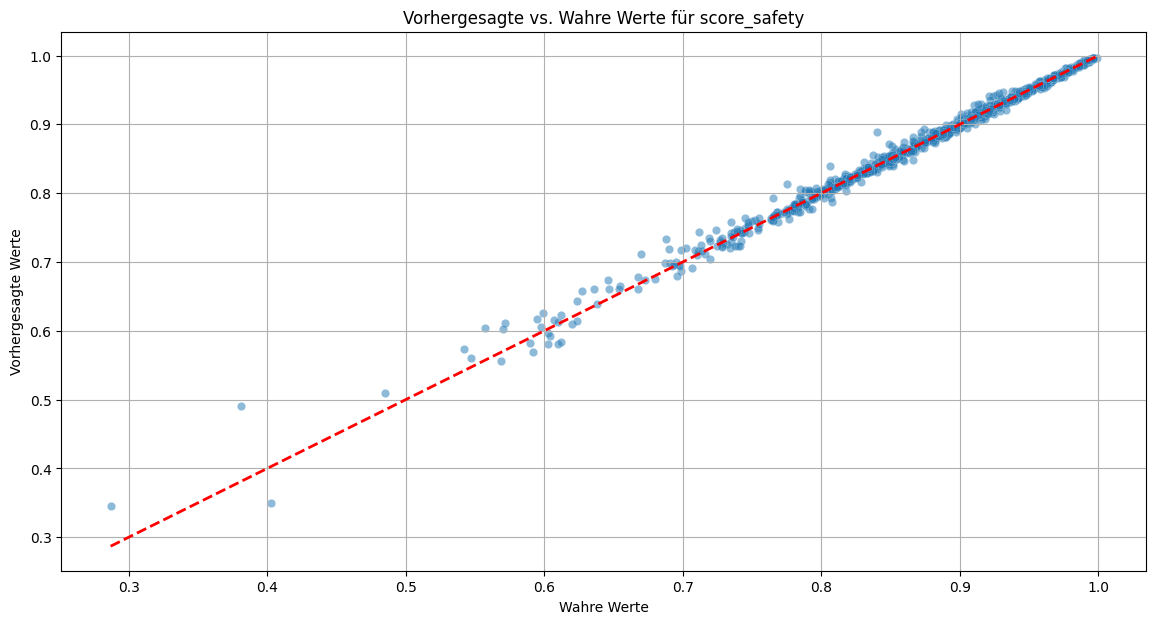

score_safety: 0


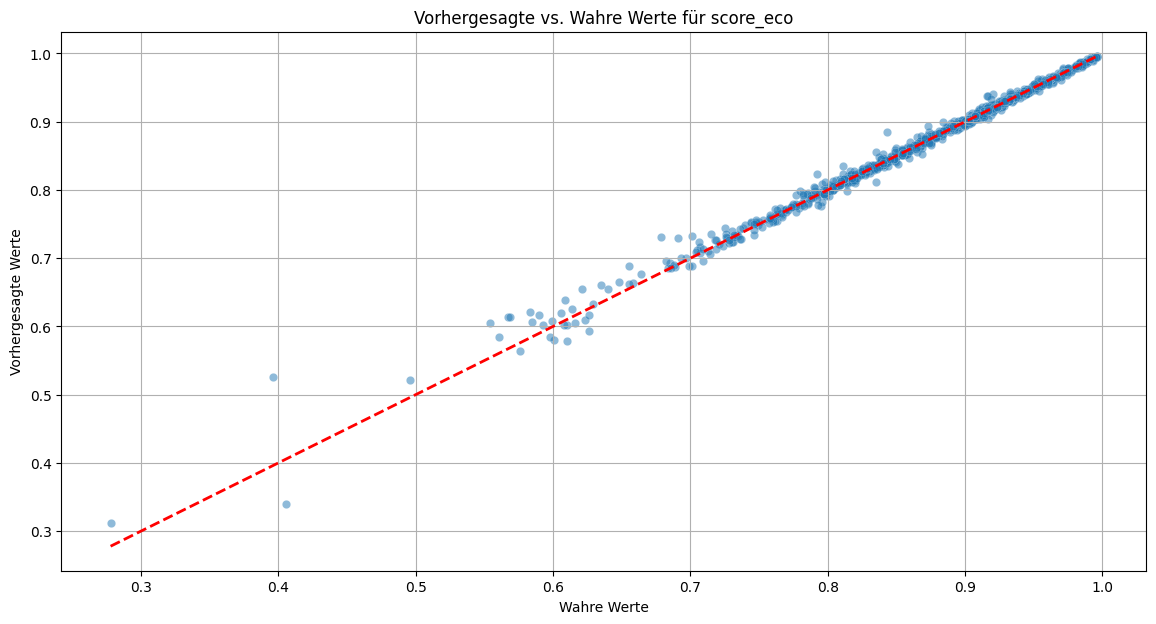

score_eco: 0


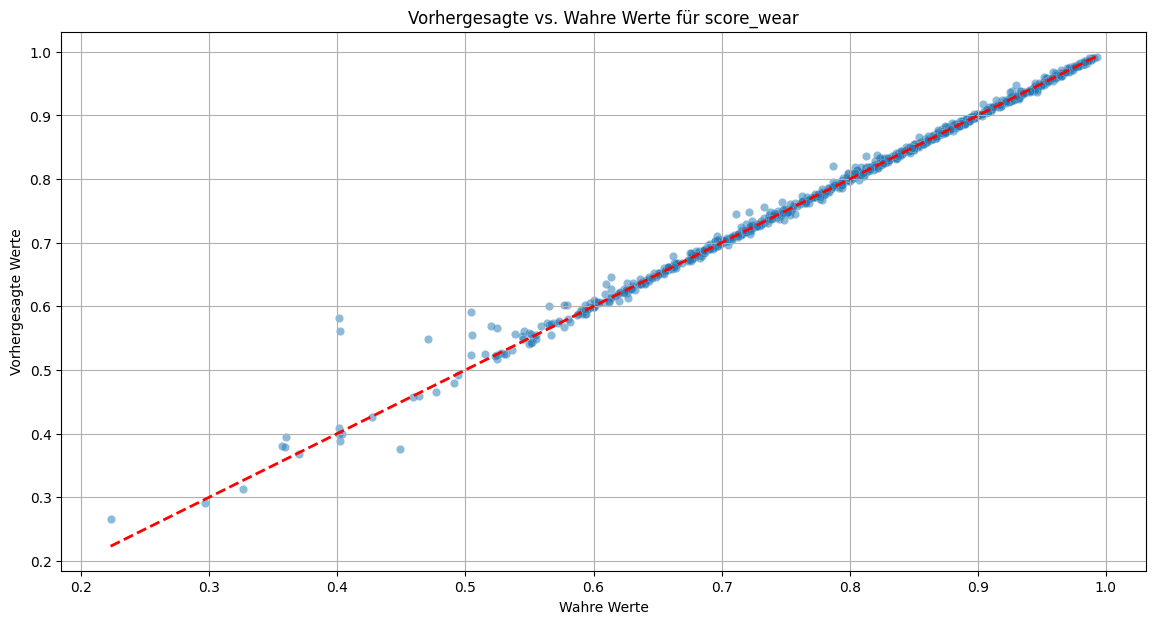

score_wear: 0
Evaluierung für score_safety:
Mean Absolute Error: 0.004026352733686139
Mean Squared Error: 6.269458012698513e-05
R^2 Score: 0.9925706153571157

Evaluierung für score_eco:
Mean Absolute Error: 0.003700361552028376
Mean Squared Error: 6.21933717566149e-05
R^2 Score: 0.9925632371930886

Evaluierung für score_wear:
Mean Absolute Error: 0.00325873368606709
Mean Squared Error: 9.673287732627851e-05
R^2 Score: 0.9944970587707123



In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Random Forest Regressor erstellen
rf = RandomForestRegressor(n_estimators=500, random_state=42)

# Multi-Output Regressor erstellen
multi_target_rf = MultiOutputRegressor(rf)

# Modell fitten
multi_target_rf.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = multi_target_rf.predict(X_test)

# Visualisierung der Ergebnisse
def plot_results(y_true, y_pred, target_name):
    plt.figure(figsize=(14, 7))
    plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='w', linewidth=0.2)
    plt.xlabel('Wahre Werte')
    plt.ylabel('Vorhergesagte Werte')
    plt.title(f'Vorhergesagte vs. Wahre Werte für {target_name}')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.grid(True)
    plt.show()

# Plots für jede Zielvariable erstellen
target_names = ['score_safety', 'score_eco', 'score_wear']
for i, target_name in enumerate(target_names):
    plot_results(y_test.iloc[:, i], y_pred[:, i], target_name)
    print(f'{target_name}: {np.int32(np.mean(np.int32(y_pred[:, i])).round(3) * 1000)}')

# Evaluation der Ergebnisse
for i, target_name in enumerate(target_names):
    mar = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Evaluierung für {target_name}:")
    print(f"Mean Absolute Error: {mar}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print()

Accuracy für jede Ausgabe:
h_label_safety: 0.9477769936485533
h_label_eco: 0.944954128440367
h_label_wear: 0.9414255469301341

Klassifikationsbericht für h_label_safety:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         4
           6       0.76      0.59      0.67        22
           7       0.85      0.83      0.84        94
           8       0.94      0.94      0.94       361
           9       0.96      0.97      0.97       618
          10       0.97      0.98      0.98       313

    accuracy                           0.95      1417
   macro avg       0.68      0.65      0.65      1417
weighted avg       0.95      0.95      0.95      1417


Klassifikationsbericht für h_label_eco:

              precision    recall  f1-score   support

           2       0.00    

e:\MLD Studium\Sem02\Projektarbeit\Coding\CarSenseML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\MLD Studium\Sem02\Projektarbeit\Coding\CarSenseML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\MLD Studium\Sem02\Projektarbeit\Coding\CarSenseML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

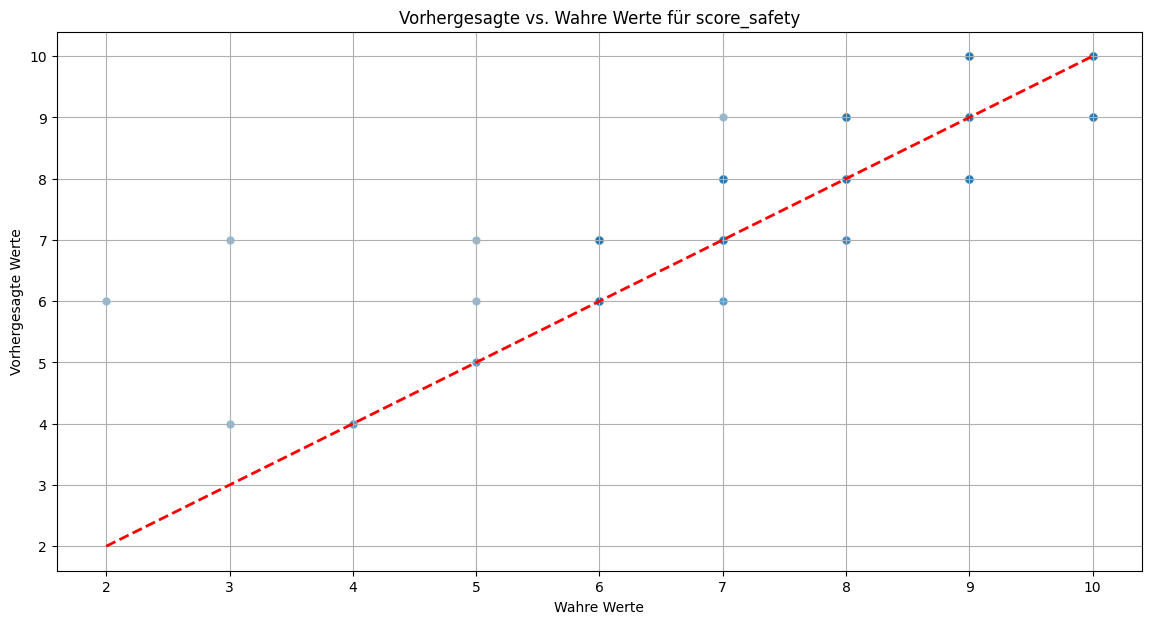

score_safety: 878


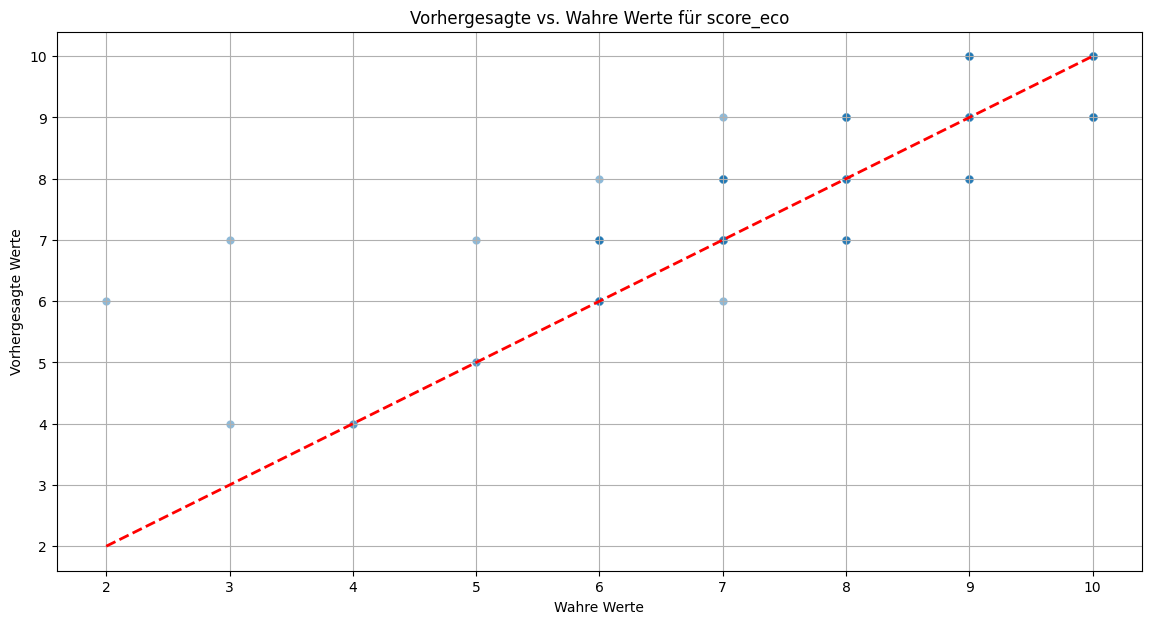

score_eco: 879


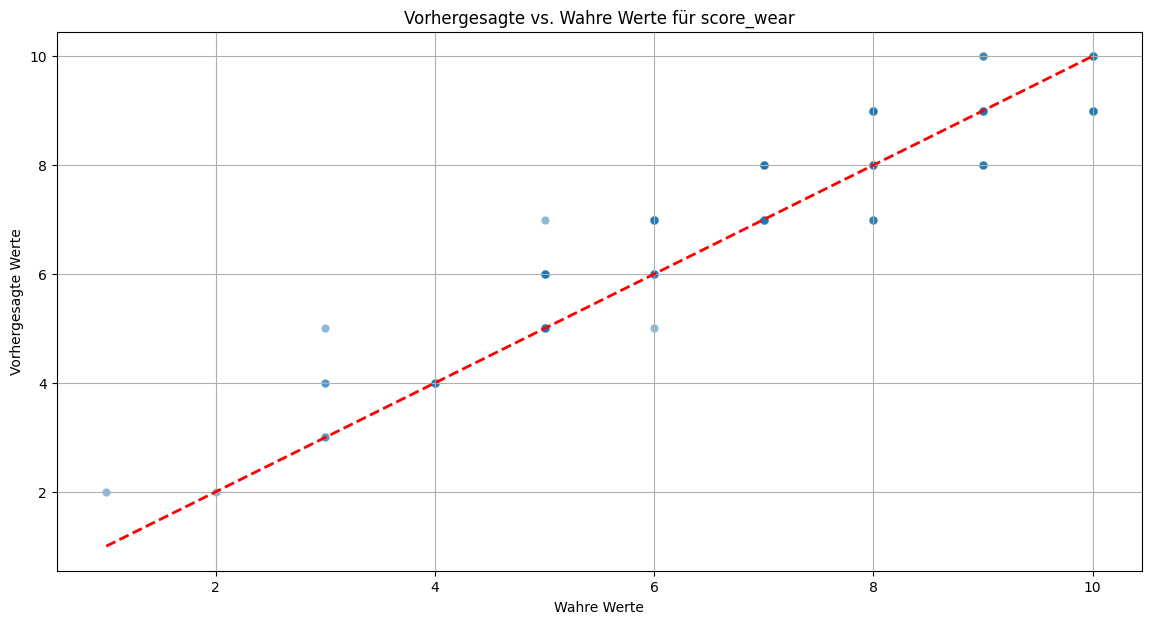

score_wear: 818
Evaluierung für score_safety:
Mean Absolute Error: 0.05786873676781934
Mean Squared Error: 0.0776287932251235
R^2 Score: 0.9213175958429118

Evaluierung für score_eco:
Mean Absolute Error: 0.061397318278052226
Mean Squared Error: 0.08256880733944955
R^2 Score: 0.9159528777656786

Evaluierung für score_wear:
Mean Absolute Error: 0.05998588567395907
Mean Squared Error: 0.06280875088214538
R^2 Score: 0.9698476903464217



In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Beispiel: DataFrame df_learing initialisieren
# df_learing = pd.read_csv("path_to_your_csv_file.csv")

# Merkmalsvariablen und Zielvariablen
X = df_learing[['delta_engine_rpm', 'delta_engine_load', 'delta_vehicle_speed', 'diff_allowed_speed', 'throttle_pos', 'delta_throttle_pos', 'vehicle_speed', 'engine_rpm', 'engine_load']]
y = df_learing[['h_label_safety', 'h_label_eco', 'h_label_wear']]

# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest Classifier erstellen
rf_class = RandomForestClassifier(n_estimators=500, random_state=42)

# MultiOutputClassifier mit dem RandomForest als Basis-Klassifikator erstellen
multi_target_rf_class = MultiOutputClassifier(rf_class, n_jobs=-1)

# Modell trainieren
multi_target_rf_class.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred = multi_target_rf_class.predict(X_test)

# Metriken berechnen
print("Accuracy für jede Ausgabe:")
for i, col in enumerate(y.columns):
    print(f"{col}: {accuracy_score(y_test[col], y_pred[:, i])}")

# Klassifikationsberichte für jede Zielvariable
for i, col in enumerate(y.columns):
    print(f"\nKlassifikationsbericht für {col}:\n")
    print(classification_report(y_test[col], y_pred[:, i]))

# Visualisierung der Ergebnisse
def plot_results(y_true, y_pred, target_name):
    plt.figure(figsize=(14, 7))
    plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='w', linewidth=0.2)
    plt.xlabel('Wahre Werte')
    plt.ylabel('Vorhergesagte Werte')
    plt.title(f'Vorhergesagte vs. Wahre Werte für {target_name}')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.grid(True)
    plt.show()

# Plots für jede Zielvariable erstellen
target_names = ['score_safety', 'score_eco', 'score_wear']
for i, target_name in enumerate(target_names):
    pred = y_pred[:, i]
    plot_results(y_test.iloc[:, i], pred, target_name)
    print(f'{target_name}: {np.int32(np.mean(np.int32(pred)).round(3) * 100)}')

# Evaluation der Ergebnisse
for i, target_name in enumerate(target_names):
    mar = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Evaluierung für {target_name}:")
    print(f"Mean Absolute Error: {mar}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print()

In [68]:
print(type(X_train))

X_train.columns

<class 'pandas.core.frame.DataFrame'>


Index(['delta_engine_rpm', 'delta_engine_load', 'delta_vehicle_speed',
       'diff_allowed_speed', 'throttle_pos', 'delta_throttle_pos',
       'vehicle_speed', 'engine_rpm', 'engine_load'],
      dtype='object')

In [50]:
import pickle

# Annahme: multi_target_rf ist dein trainiertes Multi-Output Regressor Modell

# Modell exportieren (speichern)
with open('multi_target_rf_model_classification.pkl', 'wb') as file:
    pickle.dump(multi_target_rf_class, file)

---

In [20]:
display(df_learing.head(10))

,engine_load,engine_rpm,throttle_pos,vehicle_speed,allowed_speed,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,delta_throttle_pos,delta_allowed_speed,...,ma_delta_vehicle_speed,ma_delta_throttle_pos,ma_delta_allowed_speed,h_raw_eco,h_raw_wear,diff_allowed_speed,h_raw_safety,h_label_eco,h_label_wear,h_label_safety
884,35,2612,21,121,130,12,-54,1,-60,0.0,...,0.0,1.0,0.0,0.801,0.661,9,0.795,3,3,3
970,36,2833,21,131,130,5,16,0,2,0.0,...,1.0,0.0,0.0,0.807,0.636,1,0.802,3,3,3
2473,30,1838,18,85,70,21,-13,1,-3,0.0,...,-0.0,0.0,0.0,0.889,0.802,15,0.882,4,3,4
3413,24,1597,16,74,70,5,3,0,0,0.0,...,1.0,-1.0,0.0,0.921,0.849,4,0.918,4,3,4
811,7,1608,13,41,50,411,-4,-2,1,0.0,...,-1.0,0.0,0.0,0.796,0.783,9,0.788,3,3,3
4582,10,1166,12,36,30,-27,0,-1,0,0.0,...,-0.0,0.0,0.0,0.958,0.921,6,0.954,4,4,4
3810,9,1511,15,46,50,-15,0,-1,3,0.0,...,1.0,0.0,0.0,0.932,0.865,4,0.928,4,3,4
2356,12,976,14,55,50,-291,2,-4,2,0.0,...,-2.0,-6.0,0.0,0.883,0.907,5,0.878,4,4,4
555,80,2149,32,49,50,241,15,7,-55,0.0,...,0.0,2.0,0.0,0.767,0.700,1,0.778,3,3,3
4163,9,1386,12,20,30,28,0,0,0,0.0,...,1.0,-0.0,0.0,0.941,0.886,10,0.937,4,4,4


In [146]:
df_learing.to_csv(f'E:\\MLD Studium\\Sem02\\Projektarbeit\\Coding\\CarSenseML\\src\\prototyping\\data\\df_learning_labeled.csv', ';', index=False)

C:\Users\NilsO\AppData\Local\Temp\ipykernel_19120\2460438686.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  df_learing.to_csv(f'E:\\MLD Studium\\Sem02\\Projektarbeit\\Coding\\CarSenseML\\src\\prototyping\\data\\df_learning.csv', ';', index=False)


In [57]:
with open('multi_target_rf_model_classification.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

,delta_engine_rpm,delta_engine_load,delta_vehicle_speed,diff_allowed_speed,throttle_pos,delta_throttle_pos,vehicle_speed,engine_rpm,engine_load
2354,243,0,-1,8,14,2,18,1187,20
2577,-179,7,-3,9,14,2,19,1297,16
704,41,-50,3,18,15,-18,88,2827,34
1839,239,16,3,9,18,3,21,1479,32
836,-20,-24,-1,6,16,-4,136,2927,15
...,...,...,...,...,...,...,...,...,...
740,18,66,0,10,28,14,120,2594,76
5266,1,0,0,8,13,0,2,774,36
4657,-110,2,-1,4,12,0,6,732,26
503,51,39,3,9,88,55,121,2613,99


In [59]:
predictions = loaded_model.predict(X_test)
scores = {}

target_names = ['score_safety', 'score_eco', 'score_wear']
for i, target_name in enumerate(target_names):
    mean = np.int32(np.mean(predictions[:, i]).round(2) * 100)
    scores[f'{target_name}'] = f'{mean}'

for key in target_names:
    print(scores[key])

878
881
821
